# ATG Data Scientist Challenge

Thank you for your interest in joining the data science team at Uber ATG. The next step is to complete Uber ATG’s take home exercise. This will allow you to get an idea of what it's like to work for us while showcasing your statistics, programming, and data analysis capabilities. 

While we invite you to fill out the remainder of this notebook for your submission, you may send your results back in any format as long as the work/code/analysis is **reproducible**. We've had candidates submit RMarkdown HTMLs or LaTeX generated PDFs as well. You may use any language (or Jupyter Kernel) you want but keep in mind that we primarily do deployment, engineering, and analysis work in Python.

There is no time limit, but please try to send back the completed assignment within 1 week of receiving it. Please delete any data you have downloaded from us after submitting the assignment.

If you have any questions about the assignment, please reach out to your recruiter.

Thanks,
ATG Data Science


# Driver Signup Analysis

You can use the csv: 
  * `ds_challenge_v2_data.csv` 

included in the zip file included with this notebook or download the data set at the following link:

* [**Dataset Download Link**](https://drive.google.com/a/uber.com/file/d/0BxkZqrCogcyWbUs2Smhlc0VSams/view?usp=drive_web)


Uber’s Driver team is interested in predicting which driver signups are most likely to start driving. To help explore this question, we have provided a sample dataset of a cohort of driver signups in January 2015. The data was pulled a few months after they signed up to include the result of whether they actually completed their first trip. It also includes several pieces of background information gathered about the driver and their car.


See below for a detailed description of the dataset:

- **id:** driver_id
- **city_id:** city_id this user signed up in
- **signup_os:** signup device of the user (“android”, “ios”, “website”, “other”)
- **signup_channel:** what channel did the driver sign up from (“offline”, “paid”, “organic”, “referral”)
- **signup_timestamp:** timestamp of account creation; local time in the form ‘YYYY-MM-DD’
- **bgc_date:** date of background check consent; in the form ‘YYYY-MM-DD’
- **vehicle_added_date:** date when driver’s vehicle information was uploaded (by the driver); in the form ‘YYYY-MM-DD’
- **first_trip_date:** date of the first trip as a driver; in the form ‘YYYY-MM-DD’
- **vehicle_model:** model of vehicle uploaded (i.e. Accord, Prius, 350z)
- **vehicle_year:** year that the car was made; in the form ‘YYYY’


**Our primary goal is to understand what factors are best at predicting whether a signup will start to drive, and offer suggestions to operationalize those insights to help Uber**. This take home consists of answering three main tasks with some discussion questions under them to get you started.

Ordering and presentation format is up to you, but we love analyses that are well organized and have a linear flow from data ingestion to final result(s). We especially look for well stated assumptions and an eye for business/product impact of any analysis or model.

# Abstract : 

This notebook is dedicated to the solution of Uber take home challenge. This challenge consists of three main questions and several sub-questions. Here is a list:

1 - **Conduct an exploratory analysis of the data to give us qualitative and quantitative insights.** 
    
2 - **Build a statistical model to predict whether a driver that signed up will begin driving for Uber.**
    - How did the model perform? Are there any caveats? How can Uber use your model to improve our product? 
    
3 - **Build a model to forecast the number of new drivers we expect to start every week.**
    - How would you validate a model like this? What other information would you use if you had access to all of Uber's data?    
    
    
My purpose in this study is to keep everything in line with the business question we like to answer. For example, EDA is performed to bring insights that are related to our business questions (task2 and task3). Therefore, I merged the EDA question to the next two questions. Here is a summary of our findings for each task. If you like to read the details of each step, please keep reading.


## Abstract -  Task 1: 
**Conduct an exploratory analysis of the data to give us qualitative and quantitative insights.** 
    - Does all the data make sense? Did you have to throw anything away? Are there interesting patterns that emerge?

- The data was very clean. I noticed only one outlier in the ``vehicle_year`` column.
- A new column, named ``target``, is generated based on the ``first_completed_date``. The value of the target is 1 when the date is availble and 0 otherwise. This was used as our dependant (target) variable we want to explain in the first task.
- The target variable was very well distributed throughout the 30 days of observation and I concluded that a random train-holdout split is sufficient.
- There are 54681 observations and 11 features in the data set and large portion of the data is missing. 
- 11.22% of the registrators become Uber driver. Therefore, there is an excellent margin of growth for the product if right insights are found.
- Customers are from 3 cities, use 5 type of operating systems, and come from 3 signup chanels. Moreover, there are 46 vehicle make that signed up. Toyota is the most popular vehicle make and Honda-Civic is the most popular vehicle model.
- Registration time is limited to the month of January 2016. However, we observed activation date is from the January 1st, 2016 through March 26th, 2016. Two more date time features are also provided:
time of background check consent, and the time when vehicle information was uploaded.
- There is about 48.4 of duplicate observations. Since there are small number of features, it is not easy to make an assumption for the origin of duplicates. Specially, when for large number of rows, several variables are (equally) missing. However, it is interesting to know that for non-duplicate columns, the ratio of becoming an Uber driver increases from 11.22% to 21.75% percent. This information is later used for developing new features.
- Although large portion of data is missing, we noticed that there is a rich amount of information in those missing values. For example, for observations with missing operative system data, the ratio of becoming Uber driver is 0.02 which is almost 1/6 of the whole data. 
- Almost 40% of background checkced column is missing. There is a vast welath of information in this column, however. Poeple who didn't consent the bacground check have 0.007 probablity of becoming an  UBER driver. This is 16 times smaller than the average of the population. **Uber might need to ease the background check process by providing more ways of providing information. Moreover, it might help to tell the customers about how their data will be dealt with. Finally, UBER might be able to provide different level of background check for different services so that more people can become a driver with a peace of mind.**
- Almost 75% of the vehicle_added_date column is missing. When the data is not missing, 44% of the customers become Uber driver. **Uber might be able to send follow up emails to the registrators and ask them to upload their information. Customer might commit more to the program by uploading their information. Moreover, streamlining the process might make it easier for the users to become Uber driver.**
- People using mac os have highest probablity of becomign Uber driver. The reason might be due to the possiblity of mac users being a part of a population that would like to stay up to date with the new technologies. Moreover, in general the phone users (android web, ios web) seem to be less prone to becoming UBER drivers. **UBER might need to improve the quality of their phone websites to make the experience more appealing for those users**.
- I noticed that the newer cars have higher probablity of becoming an Uber driver. The median is around 2013. **This might be due to the vehicle age requirements for drivers that are joining Uber. Uber might suggest that if the age of the car is above a certain threshould, the driver must provide additional information, barometer, car fax info, a certification of vehicle quality to prove that the vehicle is in good shape. Recall more than only 50 percent of the cars that registered are more than 3 years old.**
- Going forward, although graphically speaking, the city name doesn't affect the target variable (becoming Uber driver), we see that this feature is stitistically significant in seperating the classes.

## Abstract -  Task 2: 

**Build a statistical model to predict whether a driver that signed up will begin driving for Uber.**
    - How did the model perform? Are there any caveats? How can Uber use your model to improve our product? 

- I used the insights from EDA section and engineered several features. Most informative one was the time interval between registration and the upload of information. The next informative feature was whether ``vehicle_added_date`` column was missing, and the third one was the time diffference between the time of registration and the time that background was checked. **As discussed in the previous task, the first few days after regitration is the golden time for Uber to follow up with the users and also to facilitiate the background and data upload processes.**

- The next important feature was vehicle age. Younger vehilces have higher probablity of becoming a driver.In Uber, we can rethink how to involve older vehicles. 

- After generating 19 features, principal component analysis was used to visually demonstrate whether features carry enough information. Although several features explained small variance of the data, in total large portion of features were meaningful and the PCA graph did not totally saturate.

- Then feature importance from random forest was used to get and undrestanding of where the discriminative features are located.

- A simple logistic regression was used to check whether the feature set results in overfitting. We noticed that the features don't result in overfitting as the train and test accuracy were close. However, the model was not able to capture all the variance in target variable. We ended up with area under ROC curve of around $97\%$.

- Then 3 models are hypertunned, namely, SVM, KNN, random forest, to assure that different fature characteristics are captured. The AUC resulst for these three was very similar to logistic regiression and $AUC=0.97\%$

- Although it could be concluded from the previous models that the features are seperatinng the two classes well and complicating models doesn't improve the model, I went ahead and hypertunned a gradient boosted trees model to assure that this is the case. Again similar result was achieved.


** Conclusion**:

Model performed acceptable in predicting the very skewed classification problem. It reached area under AUC curve equal to 97%. There were however, some assumptions in the process that needs to be confirmed. For example, we assumed that all the missing values are data not provided/available by the user. Therefore, we assumed that no missing value occured due to any other data pipelining complications. **Moreover, the population of study, customers who registered in January, are not generalizable to all the users who register in Uber service. The main reason is that January is especial month as it is in the middle of winter and also right after holidays and usually people have quite different behaviour during this period of time.**

Finally, although model is designed for a particular time of the year, there seems to be some insights that Uber can use to improve its service. **First, as mentioned before, the background check can be revisited. Several levels of background for different services assure that different group of users are engaged and satisfied. Similarly, vehicle age can be revisited. For example, different services can ask for different age. This assures that users with older vehicles are also engaged in this service. Finally, we noticed that the first couple of days after registration is critical in defining whether a registered user would become a driver. Therefore, incentive, discounts, and other follow up actions can be focused on these days.**

Here is a summary of the results:

| Model | Hypertuned? | Area Under Curve |
| --- | --- | --- |
| Logistic Regression | No | 0.97 |
| Support Vector Machine | Yes | 0.96 |
| K-Nearest Neighbor | Yes | 0.96 |
| Random Forest | Yes | 0.97 |
| Gradient Boosted Trees| Yes | 0.95 |

## Abstract -  Task 3: 

3 - Build a model to forecast the number of new drivers we expect to start every week.
- How would you validate a model like this? What other information would you use if you had access to all of Uber's data?  

This was a very interesting task. The answer to this question has real business value. It can help the business team to see whether we are close to the financial goals and whether corrective actions are required.

The question was  also interesting from another perspective. Only 9 weeks (9 observations) exist in the model. One caveat was that youd dont want the outliers to dominate the model and at the same time we didn't have the luxuray to drop any observation. Here is an abstract of the solution for this task.

- We used the ``first_completed_date`` feature to generate the number of weekly activations.
- We noticed that the cumulative number of registration in the past thirty days has a very similar trend as the number of activation.
- Since the number of observations in this dataset is not enough, bootstraping samples was used to develope $95\%$ confidence intervals around slope and intercepts. 
- One of the observations was randomly dropped, and used to demonstrate a of validation report.
- The validation would, however, be different for larger data sets. Larger observations allows using actual time series forecasting. In thoese cases our holdout set is different. It consists of periodically captured weekly observations, say each month we get one week and iteratively train the model for all the data before that particular week. 
- Using the median slope and intercept, we expained 98% of the variance in target ($R^2=98$) which is an acceptable result considering the small number of observations and a single explanatory vairbale.
- Since there was not enough number of observations, we didn't go for further features as we would have lose another degree of freedom for that feature and our model was doing pretty well explaining the variance.
- This model, however, has limitations. First, it is not generalizable to other months of the year. As we explained before, month of January is speciall as it is in the middle of winter and also it is right after the holidays. Moreover, we didnt capture enough priodicity in the data. If we have more observations, say for 3 years, we can easily use already available techniques e.g. ARIMA to predict the time series. 





***$$If\ interested\ in\ the\ details\ of\ each\ task,\ please\ read\ the\ following\ sections.$$***





# Details - Task 2: 

Build a statistical model to predict whether a driver that signed up will begin driving for Uber.
How did the model perform? Are there any caveats? How can Uber use your model to improve our product?

The following is a flowchart of the workflow of this part of the take home challenge.




![UBER Take Home Challenge - Workflow](Workflow.png)



# 0- Domain Research

Before jumping into the problem, we need to perform some domain research. The main question here is, how one can become an Uber Driver?

Looking at [Uber webpage](http://www.uberdriverusa.com/) on how to become an Uber driver, we see several requirements. Those importan for us are:

"
**7. You must pass driving record check and background check.**

In addition to the above requirements, you must also pass a driving record check and background check. Basically, Uber will require you to have no major violations in the past 3 years, no drug-related driving violations in the last 7 years and no extreme infractions in the last 7 years.

In the background check, within the past seven years, you will have no violent crimes, no theft, no sexual offenses, no property damage, no drug-related offenses and no felonies committed.

You might not have the cleanest driving record or background check, but that cannot prevent you from becoming an Uber driver.

"

# 1-  Problem Formulation:

This section is dedicated to classifying whether a user becomes an Uber driver using the provided data. The purpose of the author is to find patterns that demonstrates the drivers' behaviour following their signup with Uber. There are two higher level business question that need to be answered:

Does the driver become an Uber driver? This is a "Yes"/"No" question, since we are interested to know which **class** of a certain target each driver is a part of. For problems related to classes, we need to train classifiers. For this question, our index is the ID of the driver, and our target is wheather he become a driver or not yet.


The rest of the notebook for this task is as follows:

``1-1- Required Packages``

``1-2- Defining the Choice of Metrics``

``1-3- Choice of Train, Holdout Split``

``2- Exploratory Data Analysis``

``2-1- Data Shape, Size, Columns, Index, Types,``

``2-2- Working on Null Values, Duplicates,``

``3- Visual Exploratory Data Analysis``

``3-1- Numerical Features``

``3-2- Categorical Features``

``3-3- Time-series Features``

``4- Data Preconditioning``

``4-1- Outlier Analysis``

``4-2- Train- Holdout split``

``5- Feature Engineering``

``5-1- Numerical Features, and their Statistical Significance``

``5-2- Categorical Features, and their Statistical Significance``

``5-3- Time Series Features, and their Statistical Significance``

``5-4- Model Preprocessing (Standard Scaler) ``

``5-4- Feature Selection and Feature Imporatnce (PCA, RF)``

``6- Modelling``

``6-1- Simple Model to Check Bias/Variance``

``6-2- SVM/KNN and cross validation``

``6-3- Random Forest as a Bagging Technique /Hyper Parameter Tunning``

``6-4- Gradient Boosted Trees as a Boosting Technique``

``7- Discussion and Suggestions``

## 1-1- Required Packages:

- pandas for data manipulation,

- matplotlib, Seaborn for data visualization,

- scipy for statistical Analysis

- sikit-learn for statistical modelling

- numpy for array manipulation

- datetime for time series analysis

- xgboost to perfom modelling using gradient boosted trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # inline plots with seaborn style
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
from datetime import timedelta
from xgboost import XGBClassifier
import xgboost as xgb


In [2]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12,6

## 1-2- Choice of metrics:
A very important question we need to answer at the beginning is, what do we call a good model? For classification, there are several [metrics](https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/) we can use, namely accuracy, F-1 Score and Area Under Curve, accuracy. Before knowing which one to use, we need to take a cook look at data and see how classes are distributed?

So let's import the data:

In [3]:
class_data = pd.read_csv('ds_challenge_v2_data.csv', index_col='id')
class_data.head()

,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
id,,,,,,,,,,
1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


> We need to set up our target, which is where the ``first_completed_date`` is available (which means that the driver actually started the service).

In [4]:
# here I take a look at the first_completed_date and generate a "1" if data exists in that column
#float allows easier divsion
class_data['target'] = class_data.first_completed_date.notnull().astype('float')
class_data.head()

,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,target
id,,,,,,,,,,,
1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN,0.0
4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16,1.0
5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN,0.0


> Let's see how is the class ratio (base rate). In other words, how much of the data belongs to the users who became a driver?

In [5]:
base_rate = class_data.target.mean()
print("The class base rate is {}.".format(round(base_rate*100,2)))

The class base rate is 11.22.


> The base rate is about 11.22 %. We, therefore, cannot get that much insight by evaluating the model using ``accuracy`` metric. The reason is that accuracy loses its meaning for skewed target data.
We will, therefore, use ``area under curve (AUC)`` as the metric we want to maximize. This parameter can demonstrate the method efficiency while not being affected by the class skewness.

## 1-3- Choice of Train/Holdout Split

We need to see, not only, how our technique work on the data we have available, but also how can it be generalized to the real world situation. This is best done by testing the model on a holdout dataset. The relationship between the hold-out set( data we keep intact untill the last moment), and the train data, should mimic the relationship between the whole data and real-world situation we will eventually be tested on.

We have two options for train test split, (1) time-wise split, (2) random split.

We need to take a look at the target variable to see how it changes over indexes, and make sure that our hold-out set is a random part of the data.
Let's see how target changes over time:

Text(0,0.5,'target value')

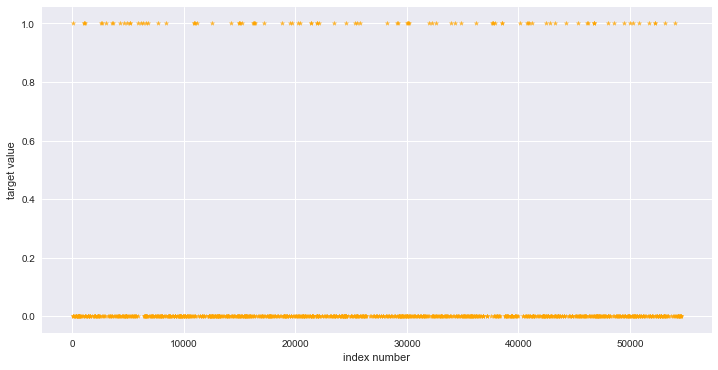

In [6]:
# we need to take a sample of data since we need the data to be representable
# we have to change target data type from boolean to integer
target_progression = class_data.reset_index().sample(1000)[['id', 'target']].astype('int')
fig = plt.figure(figsize=(20, 5))
target_progression.plot(kind='scatter',x='id',y='target', color='orange', marker = '*', alpha=0.8)
plt.xlabel('index number')
plt.ylabel('target value')

> By looking at this target, we can say that a basic random train test split is enough. 
We, moreover, don't  need to stratify our split since the classess are not extremely skewed. We perform the train holdout split in section ``4-2``.

# 2- Exploratory Data Analysis (EDA)

EDA is one of the most important part of a successful data mining project. It allows dealing with nuisance data, and also allows getting a feel for the data at hand.

## 2-1- Data Shape, Size, Columns, Index, Types

Let's see how the data is shaped, and look at the available data types and see if we need to take care of anything.

In [7]:
print("Data has {0} rows and {1} columns.".format(class_data.shape[0],class_data.shape[1]))

Data has 54681 rows and 11 columns.


In [8]:
class_data.head()

,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,target
id,,,,,,,,,,,
1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN,0.0
4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16,1.0
5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN,0.0


In [9]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54681 entries, 1 to 54681
Data columns (total 11 columns):
city_name               54681 non-null object
signup_os               47824 non-null object
signup_channel          54681 non-null object
signup_date             54681 non-null object
bgc_date                32743 non-null object
vehicle_added_date      13134 non-null object
vehicle_make            13223 non-null object
vehicle_model           13223 non-null object
vehicle_year            13223 non-null float64
first_completed_date    6137 non-null object
target                  54681 non-null float64
dtypes: float64(2), object(9)
memory usage: 5.0+ MB


>We have 11 columns, and one index column. From these, there are 4 date_time features, 5 categorical, and one numerical fatures.
** A large portion of several columns, e.g., vehicle_added_date, is missing. We might find value in them, as they might correlate with the target. It will be taken care of  in the next section**

Next, I like to check the distribution of each feature. For that, one can use ``describe`` method. But before that, I like to convert the date columns into date_time data type. This allows time series manipulation that we highly rely on later.

In [10]:
date_columns = ['signup_date', 'bgc_date', 'vehicle_added_date', 'first_completed_date']

for date_column in date_columns:
    class_data[date_column] = pd.to_datetime(class_data[date_column],infer_datetime_format=True)

In [11]:
class_data.describe()

,vehicle_year,target
count,13223.000000,54681.000000
mean,2010.568025,0.112233
std,35.219184,0.315656
min,0.000000,0.000000
25%,2008.000000,0.000000
50%,2013.000000,0.000000
75%,2015.000000,0.000000
max,2017.000000,1.000000


> The only numeric column, vehicle year, demonstrates that on average cars are from 2010, however, the median is much higher at 2013. Moreover, we see that newest cars are from 2017 and oldest are from 1995.
We see that there are some cars with vehicle year = 0. These are some peculiar cases we need to deal with. . Let's see in case "0" is outlier data, what would be the vehicle_year distribution?

In [12]:
class_data[class_data.vehicle_year!=0].describe()

,vehicle_year,target
count,13219.000000,54677.000000
mean,2011.176413,0.112241
std,4.135149,0.315666
min,1995.000000,0.000000
25%,2008.000000,0.000000
50%,2013.000000,0.000000
75%,2015.000000,0.000000
max,2017.000000,1.000000


> We can still see that the mean is smaller, and therefore, we can say that the vehicle year is left skewed and in general newer cars tend to apply more to become an Uber driver. **This gives an insight that maybe younger people are more interested in becoming Uber driver. This calls for getting an additional data from the users, say birthdate.**

By providing an argument inside describe method, we can get the distribution of categorical variables.

In [13]:
class_data.describe(include=['O'])

,city_name,signup_os,signup_channel,vehicle_make,vehicle_model
count,54681,47824,54681,13223,13223
unique,3,5,3,46,368
top,Strark,ios web,Paid,Toyota,Civic
freq,29557,16632,23938,3219,689


>We observe that:
- there are three cities in this data set and Strark is highest repeated.
- same goes to signu_os, with 5 classes and ios_web being most popular.
- there are also three sign up channel and most repeated one is Paid.
- there are 46 vehicle make. We need to dive more into this feature as it might be a good candidate for categorical feature. 
- there are 368 vehicle makes, this for sure is a large number of categories. We need to take a deeper look at it in the feature engineering section to see if we can get relative information from it.

Let's see how the time-series features are distributed?

In [14]:
class_data[date_columns].describe()

,signup_date,bgc_date,vehicle_added_date,first_completed_date
count,54681,32743,13134,6137
unique,30,74,78,57
top,2016-01-05 00:00:00,2016-01-29 00:00:00,2016-01-26 00:00:00,2016-01-23 00:00:00
freq,2489,1119,377,257
first,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-04 00:00:00
last,2016-01-30 00:00:00,2016-03-25 00:00:00,2016-03-26 00:00:00,2016-02-29 00:00:00


>The drivers signed up through January and their backgrounds are checked by March 25th. Moreover, the drivers uploaded their information by March 26th.
Moreover, the first completed date finishes by the end of February. This means that none of the drivers who approved their background check and uploaded their information after the end of February has actually become a driver. This calls for engineering a feature, that captures this late submissions. 

## 2-2- Working on Null Values, Duplicates

First steps in cleaning the data is dealing with null-values and duplicates. First let's deal with the duplicate rows. We don't want to over train our model by data points that carry exactly the same information. Let's see how many duplicates do we have?

In [15]:
number_of_duplicates = class_data.duplicated().sum()
number_of_rows = class_data.shape[0]
print("{}% of the observations are duplicates.".format(round(number_of_duplicates/number_of_rows*100,1)))

48.4% of the observations are duplicates.


>We have "26467" duplicate rows, which is quite large, it is almost 50% of the data. Are we throwing them out? No!! We assume that the only parameter that can demonstrate that an observation is duplicate is the ID. Having small number of features as we have here, this number duplicates can be normal. It is actually promissing that there are this much duplicates, it shows that some patterns are available in data.
Let's see how many duplicates are avaialble including the ID?

**Caveat: we made an assumption about the origin of duplicates. However, we need to perform more research. Are they really duplicates? Is there any bug in our system that same customer is trying to submit several times? The main reason for this caution is that once the duplicates are dropped the mean target value doubles. In other words most duplicates belong to the non dirver class**.

In [16]:
base_rate = class_data['target'].mean()
print("The class base rate is {}.".format(round(base_rate*100,2)))
base_rate_dropped_duplicates = class_data.drop_duplicates()['target'].mean()
print("The class base rate when duplicates are dropped is {}.".format(round(base_rate_dropped_duplicates*100,2)))

The class base rate is 11.22.
The class base rate when duplicates are dropped is 21.75.


> Since the ID of the observations ara distinct, we assume that the duplicates are merely the results of small number of features.

Now let's take a look at the missing values. I believe the power of any model on this data set, depends on good utilization and understanding of missing values an their meaning.
There are four options when you get to NaN values:

- Dropping observations with nan values (when nans are simple meaningless coincindences)

- Deleting features with nan values (when there are too many nans and they seam to be not very explnatory)

- Imputing nans as a with new values, e.g. new class for categorical, or a very far number for numericals  when we can't throw the nans out.

- Generate a new feature from the column that has nan values, where the feature is one when there is a nan and 0 otherwise. This is in the cases when nan values carry some meaning.

Let's agin quickly look at he missing values in each column.

In [17]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54681 entries, 1 to 54681
Data columns (total 11 columns):
city_name               54681 non-null object
signup_os               47824 non-null object
signup_channel          54681 non-null object
signup_date             54681 non-null datetime64[ns]
bgc_date                32743 non-null datetime64[ns]
vehicle_added_date      13134 non-null datetime64[ns]
vehicle_make            13223 non-null object
vehicle_model           13223 non-null object
vehicle_year            13223 non-null float64
first_completed_date    6137 non-null datetime64[ns]
target                  54681 non-null float64
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 5.0+ MB


>The smallest number of null values is in coluumn ``signup_os`` which is 12.5% $(=\frac{54681-47824}{54681}\%)$ of the total number of available observations. We highly prefer not losing this much information, if it can be avoided. For that let's see if we can impute, or use the nan-value of each column. 

First, let's take a look at ``signup_os`` column.

In [18]:
class_data.fillna('missing').signup_os.value_counts() # create a cateogory for missing

ios web        16632
android web    14944
missing         6857
windows         6776
mac             5824
other           3648
Name: signup_os, dtype: int64

In [19]:
class_data[['target', 'signup_os']].fillna('missing').groupby('signup_os')['target'].mean()

signup_os
android web    0.097297
ios web        0.131734
mac            0.162775
missing        0.021584
other          0.136513
windows        0.132527
Name: target, dtype: float64

>We can see that the imputed ``missing`` category has much smaller driver approval rate that any other category. Therefore, it might be a very meaningful feature. In other words, there might be some conditions related to this missing value. For example, there might be some specific device that doesn't report the operating system. We will keep this ``nan`` value as a new category in data. Later in section 5, we will check the statistical significance of this cateogry.

In [20]:
class_data['signup_os'] = class_data['signup_os'].fillna('missing')

Let's move to ``bgc_date`` column.  Taking a look at ``info`` method used above, we see that 40% $(=\frac{54681-32743}{54681}\%)$ of the rows are missing in ``bgc_date``.
When there is no data on ``bgc_date``, it might mean that the background check has not been permitted, not necessarily the data is missing. We can check such hypothesis by checking the mean value of the bgc_date for missign and non_missing values.

In [21]:
class_data['bcg_checked'] = class_data.bgc_date.notnull().apply(lambda x: 'Yes' if x else 'No')

In [22]:
class_data[['target', 'bcg_checked']].groupby('bcg_checked')['target'].aggregate({'mean':'mean','count':'count'})

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,count
bcg_checked,,
No,0.006974,21938
Yes,0.182757,32743


>Our hyposthesis seems to be correct. For drivers with data missing on background, only 0.007 become Uber driver, which is 6% of all the approved. Therefore, we can easily say that when the data is missing on the background, the driver has not been approved/recieved/applied his/her backrgound info to move forward. Therefore, we can say that we can generate a new feature based on this feature which highly explains the variablity. Let's prove this by checking the significance of this observation.

In [23]:
missing = class_data[class_data.bcg_checked=='Yes'].target
rest = class_data[class_data.bcg_checked=='No'].target
stats.ttest_ind(rest, missing)

Ttest_indResult(statistic=-66.34529950072451, pvalue=0.0)

> We see that, statistically speaking, the new feature is capable of describing the variance in the target data.

Not Let's move to the next features.

vehicle_added_date  has 13134 non-null datetime64[ns] which is we see that 75% $(=\frac{54681-13134}{54681}\%)$ of the rows. 

We will write a piece of code that calculates the significance of missing values.

In [24]:
def missing_value_significance(dataframe, column):
    print('Checking if missing value in '+column+' is significant.\n')
    print("Mean value for each class level.\n")
    dataframe[column+'_available'] = dataframe[column].notnull().apply(lambda x: 'Yes' if x else 'No')
    print(dataframe[['target', column+'_available']].groupby(column+'_available')['target'].aggregate({'mean':'mean','count':'count'}))
    missing = dataframe[dataframe[column+'_available']=='Yes'].target
    rest = dataframe[dataframe[column+'_available']=='No'].target
    print('Checking if p-value is significant.\n')
    print(stats.ttest_ind(rest, missing))

In [25]:
missing_value_significance(class_data, 'vehicle_added_date')

Checking if missing value in vehicle_added_date is significant.

Mean value for each class level.

                                  mean  count
vehicle_added_date_available                 
No                            0.006378  41547
Yes                           0.447084  13134
Checking if p-value is significant.

Ttest_indResult(statistic=-173.76141725983868, pvalue=0.0)


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


>The missing values on the vehicle added date are also very informative and we will keep them. **UBER might be able to send follow up emails to the registrators and ask them to upload their information. User might commit more to the program by uploading their information. Moreover, streamling the process might make it easier for the users to become an Uber driver.**

Now, let's move to the next three columns, they have the same number of null objects. Intuitively, we guess the null values are from the same rows. Let's check that.

vehicle_make    13223 non-null object

vehicle_model    13223 non-null object

vehicle_year    13223 non-null float64

In [26]:
info_column = ['vehicle_make','vehicle_model','vehicle_year']
class_data[info_column].dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13223 entries, 4 to 54305
Data columns (total 3 columns):
vehicle_make     13223 non-null object
vehicle_model    13223 non-null object
vehicle_year     13223 non-null float64
dtypes: float64(1), object(2)
memory usage: 413.2+ KB


> Yes! We see that hey are from the same observations. Therefore, we need to only analyse one of them and see if we can generate some information from it?

In [27]:
missing_value_significance(class_data, 'vehicle_make')

Checking if missing value in vehicle_make is significant.

Mean value for each class level.

                            mean  count
vehicle_make_available                 
No                      0.006368  41458
Yes                     0.444150  13223
Checking if p-value is significant.

Ttest_indResult(statistic=-172.59479452381981, pvalue=0.0)


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


> Yes. We see that in this feature also the missing values carries information. We will keep this. 

# 3- Visual Exploratory Data Analysis

Next, we need to visualize and see some information through visualization.

## 3-1- Numerical Features

We only have one numerical faeture, let's ee how it looks like.

Text(0.5,0,'Year vehicle built')

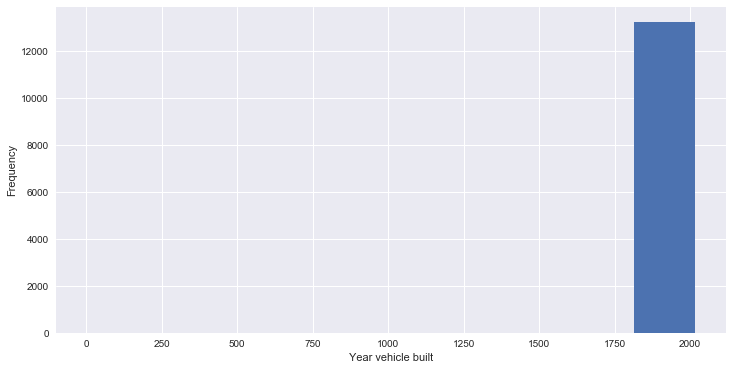

In [28]:
class_data.vehicle_year.plot(kind='hist')
plt.xlabel('Year vehicle built')

We saw in section 2-1 that this column has some 0 values which we are not sure what they mean. For now we drop them and see if they are important.

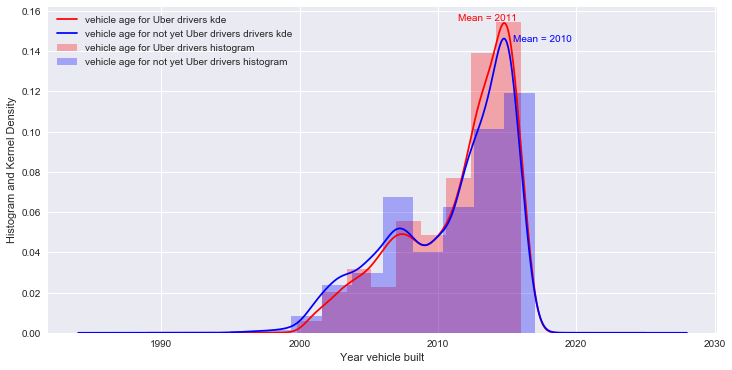

In [29]:
fig = plt.figure(figsize=(12,6))
plt.hist(class_data[(class_data.vehicle_year!=0)&(class_data.target==1)].vehicle_year.dropna(),
         normed = True, alpha = 0.3, color='red', label='vehicle age for Uber drivers histogram')
class_data[(class_data.vehicle_year!=0)&(class_data.target==1)].vehicle_year.dropna().plot(kind='kde', color='red', label ='vehicle age for Uber drivers kde')
plt.xlabel('Year vehicle built')
plt.ylabel('Histogram and Kernel Density')
mean_yes = class_data[(class_data.vehicle_year!=0)&(class_data.target==1)].vehicle_year.dropna().mean()
plt.annotate('Mean = '+str(int(mean_yes)), (mean_yes,0.155), color='red')

plt.hist(class_data[(class_data.vehicle_year!=0)&(class_data.target==0)].vehicle_year.dropna(),
         normed = True, alpha = 0.3, color='blue', label='vehicle age for not yet Uber drivers histogram')
class_data[(class_data.vehicle_year!=0)&(class_data.target==0)].vehicle_year.dropna().plot(kind='kde', color='blue', label ='vehicle age for not yet Uber drivers drivers kde')
plt.xlabel('Year vehicle built')
plt.ylabel('Histogram and Kernel Density')
mean_no = class_data[(class_data.vehicle_year!=0)&(class_data.target==0)].vehicle_year.dropna().mean()
plt.annotate('Mean = '+str(int(mean_no)), (mean_no+4.5,0.145), color='blue')
plt.legend()
plt.show()

> Distribution is slightly different. We can see that the vehicles woe become uber driver are about 1.5 years younger than the one who hasn't yet become a driver.

In [30]:
class_data[['target', 'vehicle_year']].groupby('target')['vehicle_year'].aggregate({'mean':'mean','count':'count'})

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,count
target,,
0.0,2009.863129,7350
1.0,2011.450196,5873


> This feature seems to be very promissing for generating a feature.

## 3-2- Categorical Features

We have a few categorical features. Main three are:

- city_name
- signup_os
- signup_channel

(The rests are added through our missing value analysis. You can ignore them here).

In [31]:
class_data.describe(include=['O'])

,city_name,signup_os,signup_channel,vehicle_make,vehicle_model,bcg_checked,vehicle_added_date_available,vehicle_make_available
count,54681,54681,54681,13223,13223,54681,54681,54681
unique,3,6,3,46,368,2,2,2
top,Strark,ios web,Paid,Toyota,Civic,Yes,No,No
freq,29557,16632,23938,3219,689,32743,41547,41458


Mosaic plot gives a very good picture of the categorical data when the number of categories are small and the target is also categorical (for classication tasks).

Let's see the first feature (``city_name``).

Text(0,0.5,'target')

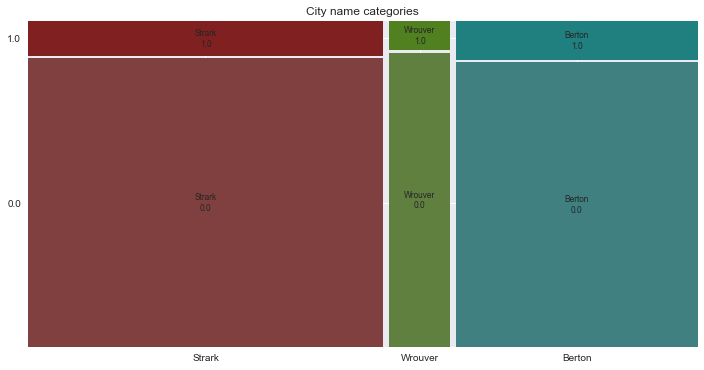

In [32]:
mosaic(class_data, ['city_name','target'], title ='City name categories',
       gap=0.01)
plt.ylabel('target')

> It seems city of has lower Uber driver ratio. Let's quickly look at the Chi-square test on these features and see if they explain something.

Chi-square test runs on contingency table which correlates categorical variables to each other.

In [33]:
observed_city_contingency = pd.crosstab(class_data.target,class_data.city_name)
observed_city_contingency

city_name,Berton,Strark,Wrouver
target,,,
0.0,17680,26318,4546
1.0,2437,3239,461


In [34]:
_, p, _, _ = chi2_contingency(observed_city_contingency)
print("The p-value for the city feature is {}.".format(p))

The p-value for the city feature is 4.2967762262368374e-09.


> The city name feature is  informative as its p-value is much smaller than type-1 error of significance 0.05.

Let's move to the next categorical feature, ``signup_os``.

Text(0,0.5,'target')

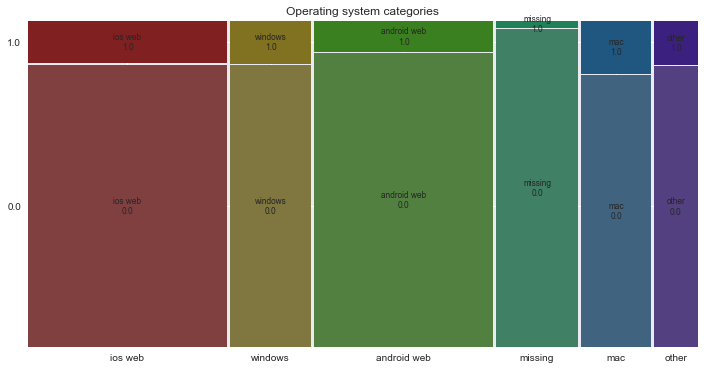

In [35]:
mosaic(class_data, ['signup_os','target'], title ='Operating system categories')
plt.ylabel('target')

>Web site (through ios and android) is the main interface for registration. Moreover, missing values seem to have much smaller chance of final registration.

In [36]:
observed_os_contingency = pd.crosstab(class_data.target,class_data.signup_os)
observed_os_contingency

signup_os,android web,ios web,mac,missing,other,windows
target,,,,,,
0.0,13490,14441,4876,6709,3150,5878
1.0,1454,2191,948,148,498,898


In [37]:
_, p, _, _ = chi2_contingency(observed_os_contingency)
print("The p-value for the operating system feature is {}.".format(p))

The p-value for the operating system feature is 6.119148515923839e-184.


>Absolutely statistically signiticant. 

Let's move to the next feature, ``signup_channel``. 

Text(0,0.5,'target')

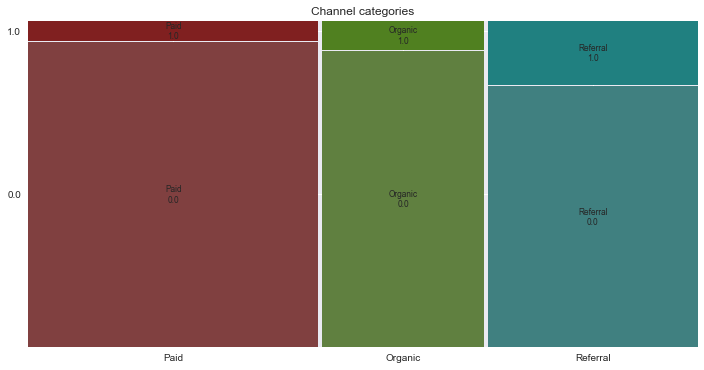

In [38]:
mosaic(class_data, ['signup_channel','target'], title ='Channel categories')
plt.ylabel('target')

>Referals are most loyals and the paid group are least. Let's see if there is statistical significance.

In [39]:
observed_channel_contingency = pd.crosstab(class_data.target,class_data.signup_channel)
observed_channel_contingency

signup_channel,Organic,Paid,Referral
target,,,
0.0,12217,22456,13871
1.0,1210,1482,3445


In [40]:
_, p, _, _ = chi2_contingency(observed_channel_contingency)
print("The p-value for the channel feature is {}.".format(p))

The p-value for the channel feature is 0.0.


Before going to the next phase, we need to take care of a categorical variable, ***vehicle_model***. There are vehicles in that data set that are really rare, and might actually result in overfitting, and also possibly impossible train_test split. What I will be doing, is to categorize rare levels of the categories into one single group. If number of vehicles in that class is less than 40, we call it rare.

In [41]:
vehicle_model_count_dict = dict(class_data[['vehicle_model', 'target']].fillna('missing').groupby('vehicle_model').count())

In [42]:
class_data['vehicle_model'] = class_data['vehicle_model'].fillna('missing').apply(
    lambda x: 'rare' if vehicle_model_count_dict['target'][x]<30 else x)

## 3-3- Time-series Features

Now let's see how target changes over time with the signup date. What we want to see here is how many registeration is performed daily and from them, how much of the portion has been successfull.

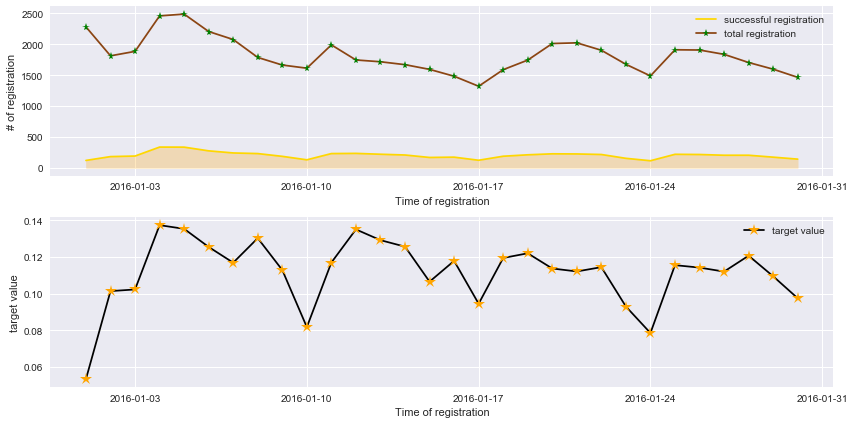

In [43]:
registeration_count= class_data.set_index('signup_date')['target'].resample('D').count()
activation_mean = class_data.set_index('signup_date')['target'].resample('D').mean()
successfull_registration = activation_mean*registeration_count
plt.subplot(211)
plt.plot(successfull_registration.index,successfull_registration, color='gold', label = 'successful registration')
plt.plot(registeration_count.index,registeration_count, color='saddlebrown', label = 'total registration',marker='*',
         markerfacecolor='green', markersize=8)
plt.fill_between(registeration_count.index,successfull_registration, alpha=0.25, color='orange')
plt.xlabel("Time of registration")
plt.ylabel('# of registration')
plt.legend()
plt.subplot(212)
plt.plot(successfull_registration.index,activation_mean, color='black', label = 'target value',marker='*',
         markerfacecolor='orange', markersize=12)
plt.ylabel('target value')
plt.xlabel('Time of registration')
plt.legend()
plt.tight_layout()

>From the left top we can see that there is a weekley periodicity in the number of successful registration. It is evident that the number of registration decreases over the weekend (e.g. 2016-01-10 is Sunday), and it goes up in the beginning of the week. 

>From the bottom figure, we see that in the same way, the target ratio (of drivers to non-drivers) also decreases over weekends. This means that in general less drivers start their work over the weekend.

Let's now see how the response variable changes over time. In other words, how many daily activation do we have?

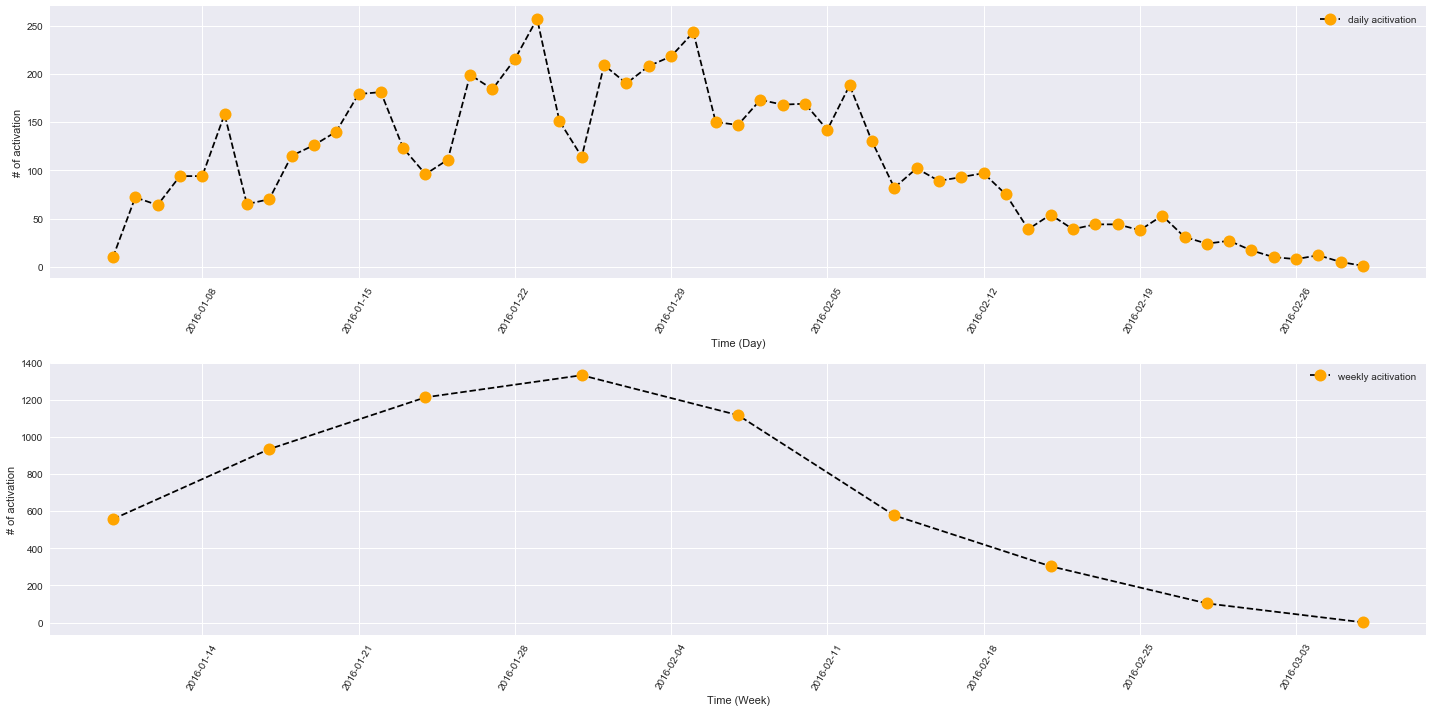

In [44]:
fig1 = plt.figure(figsize=(20, 10))
plt.subplot(211)
activation_count_daily = class_data.set_index('first_completed_date')['target'].resample('D').count()
plt.plot(activation_count_daily.index,activation_count_daily, color='black', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=12, label = 'daily acitivation')
plt.ylabel('# of activation')
plt.xlabel('Time (Day)')
plt.legend()
plt.xticks(rotation=60)
plt.subplot(212)
activation_count_weekly = class_data.set_index('first_completed_date')['target'].resample('W').count()
plt.plot(activation_count_weekly.index,activation_count_weekly, color='black', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=12, label = 'weekly acitivation')
plt.ylabel('# of activation')
plt.xlabel('Time (Week)')
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout()

>We have a meaningful variation in the daily response of the customers who registered in January. End of the January is the peak and as we progress toward the end of February it highly decreases.

# 4- Data Preconditioning:

There are a couple of preconditioning steps we need to take care before going into feature engineering. First we need to take care of outliers, and then perform a train-holdout study to assure correct generalization.

# 4-1- Outlier Analysis

Outliers analysis is a very important preprocessing step. We need to analyze if the outliers carry any information. Througout this study, the only feature I notice that has outlier, is the vehicle year that has some zero values. Let's quickly look at them.

In [45]:
print("There are {} outliers in vehicle_year feature."
     .format(sum(class_data.vehicle_year==0)))

There are 4 outliers in vehicle_year feature.


In [46]:
class_data[class_data.vehicle_year==0]

,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,target,bcg_checked,vehicle_added_date_available,vehicle_make_available
id,,,,,,,,,,,,,,
20018,Berton,other,Organic,2016-01-13,NaT,2016-02-29,Bike,rare,0.0,NaT,0.0,No,Yes,Yes
44838,Strark,mac,Organic,2016-01-17,2016-01-21,2016-01-26,Chevrolet,rare,0.0,NaT,0.0,Yes,Yes,Yes
48129,Strark,ios web,Paid,2016-01-06,2016-01-09,2016-01-10,Ford,rare,0.0,NaT,0.0,Yes,Yes,Yes
49607,Strark,mac,Organic,2016-01-13,2016-01-21,2016-01-24,Subaru,Impreza,0.0,NaT,0.0,Yes,Yes,Yes


There are only four outliers, and it is safe to drop them.

In [47]:
class_data = class_data[class_data.vehicle_year!=0]

## 4-2- Train- Holdout split

Before, starting to create new feature from the data, we need to take a part of data out so that this data is **blinded** to all of our feature engineering process.

Train-test split from sklearn drops the column names and converts the dataframe to numpy array, we need to write a function that brings it back to dataframe format.

In [48]:
class_data = class_data.reset_index()

In [49]:
class_data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,target,bcg_checked,vehicle_added_date_available,vehicle_make_available
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,missing,NaN,NaT,0.0,No,No,No
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,missing,NaN,NaT,0.0,No,No,No
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,missing,NaN,NaT,0.0,Yes,No,No
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,1.0,Yes,Yes,Yes
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT,0.0,Yes,Yes,Yes


In [50]:
def train_holdout_split(dataframe, target_variable):
    feature_cols = [x for x in dataframe.columns.values]
    feature_cols.remove(target_variable)
    features = dataframe[feature_cols]
    target = dataframe[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
    training = pd.concat([X_train,y_train], axis=1)
    hold_out = pd.concat([X_test,y_test], axis=1)
    return [training, hold_out]

In [51]:
combined_data = train_holdout_split(class_data, 'target')

# 5- Feature Engineering

## 5-1- Numerical Feature, and its Statistical Significance

First, I will develop features from our numerical feature, ``vehicle age``. In section ``3-1`` we saw that this feature is significant in explaining variance in the target variable. We will develop a meaningful feature from this column, named vehicle_age, and then perform quantization to assure that the data skewness and outliers don't affect the modelling.

In [52]:
for dataset in combined_data:
    dataset['vehicle_age'] = 2017 - dataset['vehicle_year']
    

training_qcut, bins = pd.qcut(combined_data[0]["vehicle_age"], 3, retbins=True, labels=False)
combined_data[0]['vehicle_age'] = training_qcut
combined_data[0]['vehicle_age'] = combined_data[0]['vehicle_age'].fillna(3) # generate a new category for missing data
combined_data[1]['vehicle_age'] = pd.cut(combined_data[1]["vehicle_age"], bins=bins, labels=False, include_lowest=True)
combined_data[1]['vehicle_age'] = combined_data[1]['vehicle_age'].fillna(3) # generate a new category for missing data

In [53]:
observed_age_contingency = pd.crosstab(combined_data[0].target,combined_data[0].vehicle_age)
(observed_age_contingency)

vehicle_age,0.0,1.0,2.0,3.0
target,,,,
0.0,1898,1454,1603,27572
1.0,1599,1215,1117,175


In [54]:
_, p, _, _ = chi2_contingency(observed_age_contingency)
print("The p-value for the age category feature is {}.".format(p))

The p-value for the age category feature is 0.0.


>We obviously see that this feature passes the Chi-square test. We will keep this as a meaningful feature in the final data set.

We can now drop the vehicle year column.

In [55]:
for dataset in combined_data:
    dataset.drop(columns = 'vehicle_year', axis=1, inplace=True)

## 5-2- Categorical Features, and their Statistical Significance

We have several categorical features that we need to generate insight from.

We have a few categorical features. Main three are:

- city_name
- signup_os
- signup_channel
- vehicle_make
- vehicle_model

Before starting to work on the categories, I suggest using an interaction category between ``signup_os`` and ``signup_chanell``. 

In [56]:
for dataset in combined_data:
    dataset['web_paid_interaction'] = dataset.signup_channel.fillna("missing") + dataset.signup_os.fillna("missing")

In [57]:
combined_data[0][['target','web_paid_interaction']].groupby(
    'web_paid_interaction').target.mean()

web_paid_interaction
Organicandroid web     0.074961
Organicios web         0.091949
Organicmac             0.153782
Organicmissing         0.023162
Organicother           0.114943
Organicwindows         0.118711
Paidandroid web        0.038234
Paidios web            0.058963
Paidmac                0.088636
Paidmissing            0.000000
Paidother              0.086632
Paidwindows            0.078375
Referralandroid web    0.217825
Referralios web        0.259962
Referralmac            0.330108
Referralmissing        0.019251
Referralother          0.283673
Referralwindows        0.293651
Name: target, dtype: float64

> We see some nice observations:  We have a group that explains 33% of approvals (referral mac), and a group (paid missing) that has absoloutely zero drivers activation. We keep this feature and check its significance.

I would like to add the country of origin to the vehicle make. Maybe cars from different origin have different response. I downloaded a dataset fro [here](https://github.com/johnashu/datacamp/blob/master/automobiles.csv) that has the country of origin and MPG for most of the well-known vehicles. I will aggregate and add the mpg and country of origin to the dataet.

In [58]:
cars = pd.read_csv('cars.csv')
cars['vehicle_make'] = cars.name.apply(lambda x:x.split(" ")[0])
cars_agg = cars[['mpg','origin','vehicle_make' ]].groupby(['origin','vehicle_make']).mean().reset_index()

In [59]:
for dataset in combined_data:
    dataset.vehicle_make = dataset.vehicle_make.apply(lambda x: x.lower() if type(x) is str else x)

In [60]:
combined_data[0].head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,first_completed_date,bcg_checked,vehicle_added_date_available,vehicle_make_available,target,vehicle_age,web_paid_interaction
42793,42795,Wrouver,ios web,Paid,2016-01-23,2016-02-25,2016-03-01,hyundai,Sonata,NaT,Yes,Yes,Yes,0.0,0.0,Paidios web
12766,12767,Strark,windows,Paid,2016-01-18,NaT,NaT,NaN,missing,NaT,No,No,No,0.0,3.0,Paidwindows
19140,19141,Strark,ios web,Paid,2016-01-30,NaT,NaT,NaN,missing,NaT,No,No,No,0.0,3.0,Paidios web
49633,49638,Strark,windows,Paid,2016-01-05,2016-01-07,2016-01-12,mazda,MAZDA3,2016-01-23,Yes,Yes,Yes,1.0,1.0,Paidwindows
45809,45812,Berton,ios web,Organic,2016-01-18,NaT,NaT,NaN,missing,NaT,No,No,No,0.0,3.0,Organicios web


In [61]:
combined_data[0] = combined_data[0].merge(cars_agg, on = 'vehicle_make', how='left')
combined_data[1] = combined_data[1].merge(cars_agg, on = 'vehicle_make', how='left')

In [62]:
combined_data[0].mpg = combined_data[0].mpg.fillna(value=combined_data[0].mpg.dropna().mean())
combined_data[1].mpg = combined_data[1].mpg.fillna(value=combined_data[0].mpg.dropna().mean())

In [63]:
combined_data[0].head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,first_completed_date,bcg_checked,vehicle_added_date_available,vehicle_make_available,target,vehicle_age,web_paid_interaction,origin,mpg
0,42795,Wrouver,ios web,Paid,2016-01-23,2016-02-25,2016-03-01,hyundai,Sonata,NaT,Yes,Yes,Yes,0.0,0.0,Paidios web,NaN,28.318877
1,12767,Strark,windows,Paid,2016-01-18,NaT,NaT,NaN,missing,NaT,No,No,No,0.0,3.0,Paidwindows,NaN,28.318877
2,19141,Strark,ios web,Paid,2016-01-30,NaT,NaT,NaN,missing,NaT,No,No,No,0.0,3.0,Paidios web,NaN,28.318877
3,49638,Strark,windows,Paid,2016-01-05,2016-01-07,2016-01-12,mazda,MAZDA3,2016-01-23,Yes,Yes,Yes,1.0,1.0,Paidwindows,Asia,30.860000
4,45812,Berton,ios web,Organic,2016-01-18,NaT,NaT,NaN,missing,NaT,No,No,No,0.0,3.0,Organicios web,NaN,28.318877


In the beginning, we noticed that the duplicate rows tend to belong highly to the non-activating drivers. Let's see if we can add a column for taking duplicates into account.

In [64]:
dup_ids = list(class_data.set_index('id')[class_data.set_index('id').duplicated()].reset_index().id)
dup_ids
for data_frame in combined_data:
    data_frame['duplicated'] = data_frame.reset_index().id.apply(lambda x: "Yes" if x in dup_ids else "No")
combined_data[0][['target','duplicated']].groupby('duplicated').mean().sort_values('target')

,target
duplicated,
Yes,0.000000
No,0.216847


Before going furhter, as we saw the missing values for all these categories carry information, let's fill all the NAs with 'missing'.

In [65]:
categorical_features = combined_data[0].select_dtypes(include=['O']).columns.values
categorical_features = list(categorical_features)
#since we include the missing values, we will drop this column
categorical_features.remove('vehicle_make_available')
categorical_features

['city_name',
 'signup_os',
 'signup_channel',
 'vehicle_make',
 'vehicle_model',
 'bcg_checked',
 'vehicle_added_date_available',
 'web_paid_interaction',
 'origin',
 'duplicated']

In [66]:
for dataset in combined_data:
    dataset[categorical_features] = dataset[categorical_features].fillna('missing')
    dataset.drop(axis=1, columns='vehicle_make_available', inplace=True)

In [67]:
combined_data[0].describe(include=['O'])

,city_name,signup_os,signup_channel,vehicle_make,vehicle_model,bcg_checked,vehicle_added_date_available,web_paid_interaction,origin,duplicated
count,36633,36633,36633,36633,36633,36633,36633,36633,36633,36633
unique,3,6,3,47,90,2,2,18,4,2
top,Strark,ios web,Paid,missing,missing,Yes,No,Paidandroid web,missing,No
freq,19828,11053,15889,27747,27747,21956,27805,5231,29578,18935


**We need to convert the categories to number. Because this is what models understand. This is what called encoding.**

I am suggesting similar encoding for all these categorical variables. This is what we do:

1- First perform a mean encoding (which means for each categoriy, what is the mean target variable?).

2- Add a ranker to seperate the classess with close mean ratio.

This highly helps the linear techniques in seperating different groups. It allows the groups with higher target values to carry higher numbers and assure a good linearity. Moreover, the classes are better seperated which assures that trees-based techniques and k-neighbors techniques have less complication in their modelling.

We perform the encoding on train data and trannsfer the encoding to hold out.

The following runs through all the categorical variables and results in label encoded categorical variables.

In [68]:
df1 = combined_data[0]
df2 = combined_data[1]
target = 'target'

for category in categorical_features:
    cat_dict = dict(df1.groupby(category)[target].mean())
    i = 1
    for key, value in sorted(cat_dict.items(), key = lambda x: x[1]):
        cat_dict[key] = i
        i += 1
    df1[category] = df1[category].apply(lambda x: cat_dict[x])
    df2[category] = df2[category].apply(lambda x: np.random.randint(i) if x not in cat_dict.keys() else cat_dict[x])

Let's see how the data frames have changed.

In [69]:
combined_data[0].head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,first_completed_date,bcg_checked,vehicle_added_date_available,target,vehicle_age,web_paid_interaction,origin,mpg,duplicated
0,42795,1,4,1,2016-01-23,2016-02-25,2016-03-01,22,46,NaT,2,2,0.0,0.0,5,1,28.318877,2
1,12767,2,3,1,2016-01-18,NaT,NaT,3,1,NaT,1,1,0.0,3.0,7,1,28.318877,1
2,19141,2,4,1,2016-01-30,NaT,NaT,3,1,NaT,1,1,0.0,3.0,5,1,28.318877,1
3,49638,2,3,1,2016-01-05,2016-01-07,2016-01-12,31,53,2016-01-23,2,2,1.0,1.0,7,4,30.860000,2
4,45812,3,4,2,2016-01-18,NaT,NaT,3,1,NaT,1,1,0.0,3.0,10,1,28.318877,1


In [70]:
categorical_features.append('vehicle_age')

Let's see if our categorical features are statistically significant, and check their p-values.

In [71]:
def categorical_features_test(df, feature, target):
    observed = pd.crosstab(df[target],df[feature])    
    _, p, _, _ = chi2_contingency(observed)
    if p<0.05:
        significance = 'significant'
    else:
        significance = 'insignificant'     
    print('*'*27+' Chi-Square test results!!!'+'*'*27)
    print("The p-value for the correlation bwteern <"+feature+"> feature and target is {}.".format(round(p,4)))
    print("This dependance is statistically "+significance+"!")
    print('-'*80)

In [72]:
for category in categorical_features:
    categorical_features_test(combined_data[0], category, 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <city_name> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------
*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <signup_os> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------
*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <signup_channel> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------
*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <vehicle_

## 5-3- Time Series Features, and their Statistical Significance

One very important part of this data is the fact that it is time-series. There are numerous features capable of be extracting from the time series data.

We will consider the followings:
    
1- Day of the week (we saw in section 3-3 that the number of signup/activation decreases over the weekend and increases on Mondays)

2- Time distance since new year in weeks (we see that there is a meaningful decay in the total number of registration/activation as we get further away from the new year)

3- Time distance between signup and background check. We will fill the NAs in the background check with the last day of study. People who get their background check earlier might be faster in progressing to their driving.

4- Time distance between signup and info updated.

7- Yesterday backcast. What was yesterday number of successful driver activations.

8- Late upload: whether the user uploaded his/her information after end of february.

9- Late background: whether the user gave background permission after the end of february.

In [73]:
class_data[date_columns].describe()

,signup_date,bgc_date,vehicle_added_date,first_completed_date
count,54677,32740,13130,6137
unique,30,74,78,57
top,2016-01-05 00:00:00,2016-01-29 00:00:00,2016-01-26 00:00:00,2016-01-23 00:00:00
freq,2489,1119,376,257
first,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-04 00:00:00
last,2016-01-30 00:00:00,2016-03-25 00:00:00,2016-03-26 00:00:00,2016-02-29 00:00:00


First we will check the day of the day of the week that the registration is performed.

In [74]:
for data_set in combined_data:
    data_set['weekday'] = data_set['signup_date'].apply(lambda x:datetime.date(x).isoweekday())

ISO weekday means that Monday is "1" and Sunday is "7". Lets see how the weekdays are distributed.

In [75]:
weekday_dict = {1:"Monday", 2:"Tuesday", 3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday", 7:"Sunday"}

In [76]:
week_date_df = combined_data[0][['target', 'weekday']]
week_date_df['weekday'] = week_date_df['weekday'].apply(lambda x:weekday_dict[x])
week_date_df.groupby('weekday').mean().sort_values('target')

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,target
weekday,
Sunday,0.090866
Friday,0.099494
Saturday,0.102531
Thursday,0.118458
Wednesday,0.121440
Monday,0.122304
Tuesday,0.127977


>This validates our observation on the fact that the beginning of the week has higher acceptance while the weekend has lower.

***Business insight:***

**People who sign up during the week are more serious about finalizing their registration. This is specially true in case of people who register on Tuesday. On the other hand, on Sunday, people might only be playing around with their apps and have lower chance of progressing with their registration.**

**People regisrating on Tuesday and Monday are better options for sending followup discounts and incentives.**

**Moreover, we can send coupons and advertisement emails to the customers in the beginning of the week. This makes Uber more competitive on the days that customers are more prone to activate their accounts.**


In [77]:
categorical_features_test(combined_data[0], 'weekday', 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <weekday> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------


> We also see its statistical significance. We keep this data for future modelling. 

Let's move to the second extracted feature. Time distance since new year in weeks. Going back to figure from section 3-3, we saw that in general there is a meaningful drop in the beginning of the January in terms of target value. 

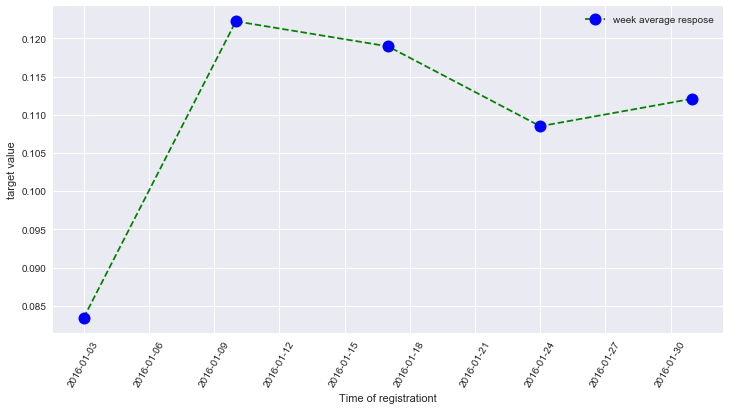

In [78]:
success_mean_weekly = class_data.set_index('signup_date')['target'].resample('W').mean()
plt.plot(success_mean_weekly.index,success_mean_weekly,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12, label = 'week average respose')
plt.ylabel('target value')
plt.xlabel('Time of registrationt')
plt.xticks(rotation = 60)
plt.legend()

We see that there is a meaningful drop in the response rate in the first three days of the observation. The reason could be explained by the holiday depression and the need that people feel to change their carreer. Therefore, I am thinking of creating a feature that captures this part of the data.

In [79]:
for data_set in combined_data:
    data_set['early_jan'] = data_set['signup_date'].apply(lambda x:x.day).apply(lambda x: "early" if x<=1 else "rest")

In [80]:
combined_data[0].groupby('early_jan')['target'].mean().sort_values()

early_jan
early    0.058272
rest     0.114371
Name: target, dtype: float64

In [81]:
categorical_features_test(combined_data[0], 'early_jan', 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <early_jan> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------


>We see this category is statistically insignificant and we need to drop it from our data sets.

Now let's see how the time difference between the signup date and the background check date affect the target. In other words, does it mean that people who performed their background eariler/later tend to have different behaviors.
We will fill the NAs with today's day, which is ``2018-04-22``. If the background is checked more than 20 days from the registation we call it late, else we call it early.

In [82]:
def early_late(x):
    if x <= 1:
        return "immediate"
    elif 1 < x <= 7:
        return "early"
    elif 7 < x <= 30 :
        return "marginal"
    else:
        return "late"
for data_set in combined_data:
    data_set['bgc_date'] = data_set['bgc_date'].fillna(pd.to_datetime('2018-04-22'))
    data_set['background_interval'] = (data_set['bgc_date'] - data_set['signup_date']).astype('timedelta64[D]').astype(
        int).apply(early_late)

In [83]:
combined_data[0].groupby('background_interval')['target'].mean().sort_values()

background_interval
late         0.006140
marginal     0.057032
early        0.224517
immediate    0.390535
Name: target, dtype: float64

We see that early background checks tend to be much more repsponsive to the registration.

**Business Insight:
People who permit their background check in the first day are 4 times as probable as the whole popuation on becoming an Uber driver. It is imperative to put large amount of incentive and advertisement to the first day registrator to finish their background checks. Moreover, if Uber can experdite the background check process, it is highly recommended to do so.**

In [84]:
categorical_features_test(combined_data[0], 'background_interval', 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <background_interval> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------


We perform a very similar analysis on the time that the data is uploaded by the driver.

In [85]:
for data_set in combined_data:
    data_set['vehicle_added_date'] = data_set['vehicle_added_date'].fillna(pd.to_datetime('2018-04-22'))
    data_set['upload_interval'] = (data_set['vehicle_added_date'] - data_set['signup_date']).astype('timedelta64[D]').astype(
        int).apply(early_late)

In [86]:
combined_data[0].groupby('upload_interval')['target'].mean().sort_values()

upload_interval
late         0.006213
marginal     0.317913
early        0.728743
immediate    0.814723
Name: target, dtype: float64

In [87]:
categorical_features_test(combined_data[0], 'upload_interval', 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <upload_interval> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------


>This is an amazing addition to the feature set. If the driver immediately upload their information, they have up to 80% chance of becoming uber drivers. This is the first feature that captures 80% of the driver class.

> ***Business insight:***
> ***In Uber, we need to assure that the costumers follow up their signup with uploading their documents. Apparently, not uploading them is the top barrier for customer following their registration. We might also be able to provide paralle requirements for documents, so that if the driver doesn't have one type of identification accessible, he/she can use another one.***

Now that I see such a response when it comes to upload interval and background interval, I was wondering how the interations of these two variable can help us? If you check your background and upload your data early, does it mean you will become an Uber driver? Let's check.

In [88]:
for dataset in combined_data:
    dataset['background_upload_interaction'] = data_set['upload_interval']+"_"+data_set['background_interval']
    dataset['background_upload_interaction'].fillna('missing', inplace=True)
combined_data[0].groupby('background_upload_interaction')['target'].mean().sort_values()

background_upload_interaction
early_marginal         0.000000
immediate_early        0.000000
immediate_marginal     0.000000
immediate_immediate    0.093178
marginal_early         0.100313
late_late              0.106350
late_marginal          0.109421
late_early             0.109503
marginal_marginal      0.112773
missing                0.113131
late_immediate         0.123894
marginal_late          0.126984
early_early            0.131988
early_immediate        0.152083
marginal_immediate     0.159483
early_late             0.166667
immediate_late         0.375000
Name: target, dtype: float64

In [89]:
categorical_features_test(combined_data[0], 'background_upload_interaction', 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <background_upload_interaction> feature and target is 0.0085.
This dependance is statistically significant!
--------------------------------------------------------------------------------


>Although such interaction is already included in the tree based techniques, it is nice to have such fature especially for the linear models.

We noticed that in general there is a meaningful pattern in daily average of target. Therefore, we might be able to use yesterday's target mean as the mimicker of todays probablity. Let's see if there is any significance on it. By this we mean, if the target ratio is lower than average yesterday, can we see it affects todays target ratio?

In [90]:
daily_target_mean = combined_data[0][['signup_date','target']].groupby('signup_date').mean().reset_index()

Now, we need to extract yesterday mean target from this data. For that, we simply move the date to tomorrows date. We also forward fill the first day.

In [91]:
daily_target_mean['signup_date'] = daily_target_mean['signup_date']+timedelta(days=1)
columns = daily_target_mean.columns.values

In [92]:
january_first = daily_target_mean.set_index('signup_date').loc['2016-01-02']
jan_first_val = january_first[0]
jan_first_day = pd.to_datetime('2016-01-01')

In [93]:
january_first_df = pd.DataFrame({"signup_date":jan_first_day,"target":jan_first_val}, index=[30])
daily_target_mean = daily_target_mean.append(january_first_df)
daily_target_mean.columns = ['signup_date', 'yesterday_target']

In [94]:
daily_target_mean.head()

,signup_date,yesterday_target
0,2016-01-02,0.058272
1,2016-01-03,0.097561
2,2016-01-04,0.103421
3,2016-01-05,0.131868
4,2016-01-06,0.134954


In [95]:
combined_data[0] = combined_data[0].merge(daily_target_mean, on = 'signup_date', how='left')
combined_data[1] = combined_data[1].merge(daily_target_mean, on = 'signup_date', how='left')

In [96]:
combined_data[0].groupby('target')['yesterday_target'].mean().sort_values()

target
0.0    0.109635
1.0    0.111738
Name: yesterday_target, dtype: float64

In [97]:
categorical_features_test(combined_data[0], 'target', 'yesterday_target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <target> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------


> Although there is not much of a differece in target class based on the mean target value, we still keep the column as it is statistically significant.

We previously noticed that none of the drivers who submitted their background consent or uploaded their data actually become an Uber driver. These could be interesing featuers we can use. Let's first develop ``late_background``.

In [98]:
def late_checker(x):
    if x == pd.to_datetime("2018-04-22"): # filling NAs with a time stamp not in our data
        return "missing"
    else:
        if x > pd.to_datetime("2016-02-29"):
            return "late"
        else:
            return "ontime"
for data_set in combined_data:
    data_set['late_background'] = data_set['bgc_date'].apply(late_checker)
    data_set['late_upload'] = data_set['vehicle_added_date'].apply(late_checker)
    
combined_data[0].head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,first_completed_date,...,mpg,duplicated,weekday,early_jan,background_interval,upload_interval,background_upload_interaction,yesterday_target,late_background,late_upload
0,42795,1,4,1,2016-01-23,2016-02-25,2016-03-01,22,46,NaT,...,28.318877,2,6,rest,late,late,late_late,0.111888,ontime,late
1,12767,2,3,1,2016-01-18,2018-04-22,2018-04-22,3,1,NaT,...,28.318877,1,1,rest,late,late,late_marginal,0.094382,missing,missing
2,19141,2,4,1,2016-01-30,2018-04-22,2018-04-22,3,1,NaT,...,28.318877,1,6,rest,late,late,late_late,0.110806,missing,missing
3,49638,2,3,1,2016-01-05,2016-01-07,2016-01-12,31,53,2016-01-23,...,30.860000,2,2,rest,early,early,late_marginal,0.131868,ontime,ontime
4,45812,3,4,2,2016-01-18,2018-04-22,2018-04-22,3,1,NaT,...,28.318877,1,1,rest,late,late,early_early,0.094382,missing,missing


In [99]:
combined_data[0].groupby('late_background')['target'].mean().sort_values()

late_background
missing    0.006473
late       0.031250
ontime     0.182905
Name: target, dtype: float64

In [100]:
combined_data[0].groupby('late_upload')['target'].mean().sort_values()

late_upload
missing    0.006330
late       0.064516
ontime     0.446516
Name: target, dtype: float64

In [101]:
categorical_features_test(combined_data[0], 'late_background', 'target')
categorical_features_test(combined_data[0], 'late_upload', 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <late_background> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------
*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <late_upload> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------


> These two values features seem to be meaningful. We keep them for our final mode.

Let's drop the existing time-series variables, since the models cant understand them. Moreover, let's perform mean encoding for the faetures that we just created. The features are ``weekday``, ``background_interval``, ``upload_interval``, ``background_upload_interaction``, ``early_jan``, ``late_upload``, ``late_background``.

In [102]:
for data_set in combined_data:
    data_set.drop(inplace=True, axis=1, columns=date_columns)

In [103]:
time_series_faetures = ['late_upload','late_background','weekday', 'background_interval','upload_interval','background_upload_interaction','early_jan']

In [104]:
df1 = combined_data[0]
df2 = combined_data[1]
target = 'target'

for category in time_series_faetures:
    cat_dict = dict(df1.groupby(category)[target].mean())
    i = 1
    for key, value in sorted(cat_dict.items(), key = lambda x: x[1]):
        cat_dict[key] = i
        i += 1
    df1[category] = df1[category].apply(lambda x: cat_dict[x])
    df2[category] = df2[category].apply(lambda x: np.random.randint(i) if x not in cat_dict.keys() else cat_dict[x])

In [105]:
for category in time_series_faetures:
    categorical_features_test(combined_data[0], category, 'target')

*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <late_upload> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------
*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <late_background> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------
*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <weekday> feature and target is 0.0.
This dependance is statistically significant!
--------------------------------------------------------------------------------
*************************** Chi-Square test results!!!***************************
The p-value for the correlation bwteern <backgro

## 5-4- Model Preprocessing

We now would like to perform standard sacaler. The reason is that the non-tree base techniques (such as KNN, ANN, linear regression) calculate some form of distance from variables which emphasizes features with larger scales. We perform standard scaling. What this does is to calculate the mean and standard deviation on each feature in training set, e.g., $\mu$ for mean, and $\sigma$ for standard deviation. This is performed only on training dataset. Then all values in train and test data set are mapped using the following function to standard normal distribution: $$ x_{new} = \frac{X_{old}-\mu}{\sigma}$$

In [106]:
for dataset in combined_data:
    dataset.set_index("id",inplace=True)

In [107]:
X_train = combined_data[0].drop(columns='target',axis=1)
y_train = combined_data[0].target

X_test = combined_data[1].drop(columns='target',axis=1)
y_test = combined_data[1].target

columns = X_train.columns.values
index_train = X_train.index.values
index_test = X_test.index.values

In [108]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),index=index_train, columns=columns)
X_test = pd.DataFrame(scaler.transform(X_test),index=index_test, columns=columns)

I like to keep the train and test data as a seperate csv file for later use.

In [109]:
X_train.reset_index().to_csv("X_train.csv")
X_test.reset_index().to_csv("X_test.csv")
y_train.reset_index().to_csv("y_train.csv")
y_test.reset_index().to_csv("y_test.csv")

## 5-5- Feature Importance and Feature Selection

We have generated several features. We need to quickly see if they are all important, and which one is more important. If some features don't carry any information we can drop them to have less complex model that is prone less to overfitting.

Let's first see how much of variance explained with features and if we can keep less of them. Before that, we will standard scale the data to have smoother looking PCA.

Text(0,0.5,'Explained Variance (%)')

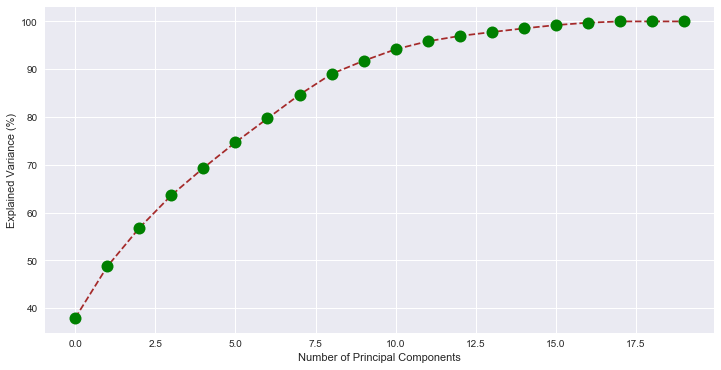

In [110]:
pca = PCA()
pca.fit(X_train) # fitting PCA on train data
var = pca.explained_variance_ratio_ # amount of variance that each feature explains
cummulative_explained_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(cummulative_explained_variance, color='brown', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=12)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance (%)')

>Looking at this figure, we see that all, except the last three features, of our features are required to explain the whole variance in the feature set. This is a very good news, as features tend to capture different part of the variance and therefore, we can rely on their non-redunduncy. 
Therefore, there is no need for feature removal. We assure enough regularization for each model so that none of the models are impacted by the less informative features.

Let's fit a random forest and quickly check which one of our features are more informative. This will direct our attention to the part of the feature set that carries discriminative information.

Feature ranking:
1. feature 15 (0.341729)
upload_interval

2. feature 19 (0.163373)
late_upload

3. feature 6 (0.146313)
vehicle_added_date_available

4. feature 14 (0.093182)
background_interval

5. feature 7 (0.060719)
vehicle_age

6. feature 4 (0.053970)
vehicle_model

7. feature 3 (0.052433)
vehicle_make

8. feature 9 (0.049060)
origin

9. feature 8 (0.010352)
web_paid_interaction

10. feature 11 (0.008660)
duplicated

11. feature 2 (0.006892)
signup_channel

12. feature 18 (0.003399)
late_background

13. feature 5 (0.003014)
bcg_checked

14. feature 1 (0.002935)
signup_os

15. feature 10 (0.002336)
mpg

16. feature 0 (0.000526)
city_name

17. feature 12 (0.000488)
weekday

18. feature 17 (0.000409)
yesterday_target

19. feature 16 (0.000201)
background_upload_interaction

20. feature 13 (0.000008)
early_jan



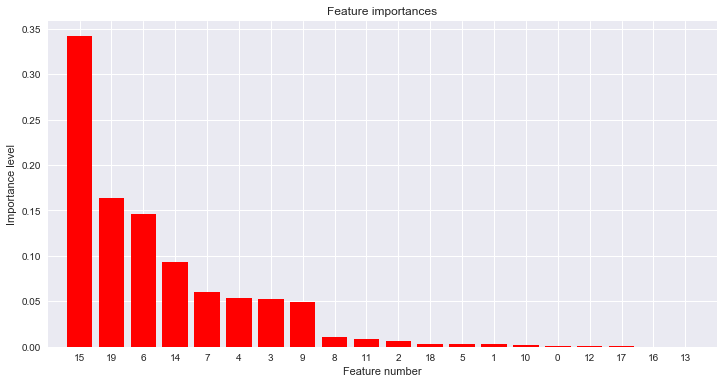

In [111]:
forest = ExtraTreesClassifier(n_estimators=2000,random_state=0, min_samples_leaf=100, max_features=5)
features = X_train.columns.values
X = X_train
y = y_train
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(features[indices[f]]+"\n")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature number')
plt.ylabel("Importance level")
plt.show()

Looking at the PCA and RF importance results, we notice that the first 11 features carry most of the information required to predict the target. However, there is still some variance being explained by the rest. We assure proper regularization for each model so that we don't overfit our model.

# 6- Modelling

Now let's get to the exciting part, modelling the technique and see how can we hypertune it for better result and get the final prediction.

## 6-1- Simple Model to Check Bias/Variance

We first fit a simple logistic regression to see how our model is doing on train and test data and see if, before going to the complication of modelling, we can take care of some issues to improve the model.

We use logistic regression here due to its simplicity and running time inexpensiveness. Not specifying any regularization, also, allows to assure that possilbe overfitting is caught. Let's build the model and see the reslts.

In [112]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
test_acc_log = round(logreg.score(X_train, y_train) * 100, 2)
train_acc_log = round(logreg.score(X_test, y_test) * 100, 2)
print("The test accuracy is {}".format(test_acc_log))
print("The training accuracy for simple logistic regression is {}".format(train_acc_log))

The test accuracy is 93.8
The training accuracy for simple logistic regression is 93.65


Accuracy on train and test data is pretty close. This means there is not much of over fitting in our model. Therefore, we are sure that what our model missess from becoming more accurate is more features.
**Business insight: more seperating feature from the customer could help this analysis largely, some examples are gender, time of the day of the signup, returning IP, age, etc.**

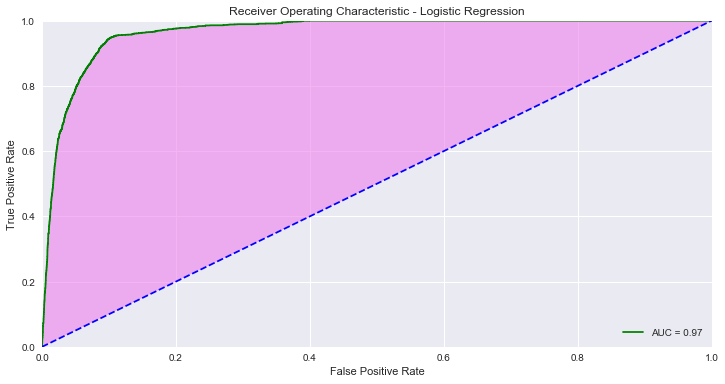

In [113]:
##Computing false and true positive rates

probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, tpr,fpr, facecolor='violet', alpha=0.6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

>We reached $AUC=0.97$ with this simple model which is acceptable. Also since there is not much of difference between train and test accuracy, we can say that the model **generalizes** well. It is suggested that some basic features like gender, age, and marriage status would become insightful in seperating different groups and reach a better AUC.

## 6-2- SVM, KNN, and Random Forest Hyperparameter Tunning

Now that we deomnstrate the feature set strength, we need to check if more complex models can handle this data better. What we do here is, before jumping to model, we will perform cross validation and gridsearch on the training set to achieve best parameters to be used in the models.

Support vector machine, k-nearest neighbors, and random forest are used here. The hypertuning cells are commented as they take long time to run. You can uncomment them if you want to get the results. I provide the results in the next cell.


In [114]:
#parameters={'kernel':['linear','rbf'],'C':[0.1,.3,1,3,10,30]}
#scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
#svc=SVC()
#clf_svc=GridSearchCV(estimator=svc,param_grid=parameters, scoring=scoring, cv=3, refit='AUC')
#clf_svc.fit(X_train, y_train)
#print("Best parameters are {}".format(clf_svc.best_params_))
#print("Best score is {}".format(clf_svc.best_score_))

This is the results we get from hypertuning the SVM:
    
***Best parameters are:***``{'C': 30, 'kernel': 'linear'}``

**Best score is 0.964985864043404**

This also gives us some more insights: **since the kernel chosen is linear, we can see that the features help us pretty much in seperating different classes. Moreover, we can see that the smaller regularization (1/C) is chosen. This means that our model is doing very well in not overfitting. The result is also consistent with the results we got from PCA analysis of features.**



In case you are interested in getting the results yourself, uncomment the cell above.

Let's check the KNN and cross validation on it.

In [115]:
#t_start = time.time()

#scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
#knn=KNeighborsClassifier(n_jobs=-1)
#parameters={'n_neighbors':[10,100],'weights':['uniform', 'distance']}
#clf_knn=GridSearchCV(estimator=knn,param_grid=parameters, scoring=scoring, cv=3, refit='AUC')
#clf_knn.fit(X_train, y_train)
#print("Best parameters are {}".format(clf_knn.best_params_))
#print("Best score is {}".format(clf_knn.best_score_))

#t_end = time.time()


#print("It took {} seconds to run this test".format(t_end-t_start))


This is the results we get from for the KNN:
    
Best parameters are ``{'n_neighbors': 100, 'weights': 'uniform'}``
Best score is ``0.9643999007173726``
It took ``437.0903055667877`` seconds to run this test.

If you are interested in getting the results, uncomment the cell block above. We will use these parameters to check the generizability of our knn-model.

In [116]:
#t_start = time.time()

#scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
#rf=RandomForestClassifier(n_jobs=-1)
#param_grid = {"max_depth": [7, None],
              #"max_features": ["sqrt", "log2"],
              #"min_samples_split": [100,200],
              #"min_samples_leaf": [10, 50],
              #"bootstrap": [True, False],
              #"criterion": ["gini", "entropy"]}
#clf_rf = GridSearchCV(rf, param_grid=param_grid,scoring=scoring, cv=3, refit='AUC')
#clf_rf.fit(X_train, y_train)
#print("Best parameters are {}".format(clf_rf.best_params_))
#print("Best score is {}".format(clf_rf.best_score_))
#t_end = time.time()
#print("It took {} seconds to run this test".format(t_end-t_start))

This is the results we get for the random forest:

Best parameters are `` {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 100}``

Best score is 0.9698143454900715
It took 551.6602492332458 seconds to run this test.

If you are interested in getting the results, uncomment the cell block above. We will use these parameters to check the generizability of our random forest model.

## 6-3-  SVM, KNN, and Random Forest Results

In [117]:
svc2 = SVC(C=30,kernel='linear',probability=True)
svc2.fit(X_train,y_train)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

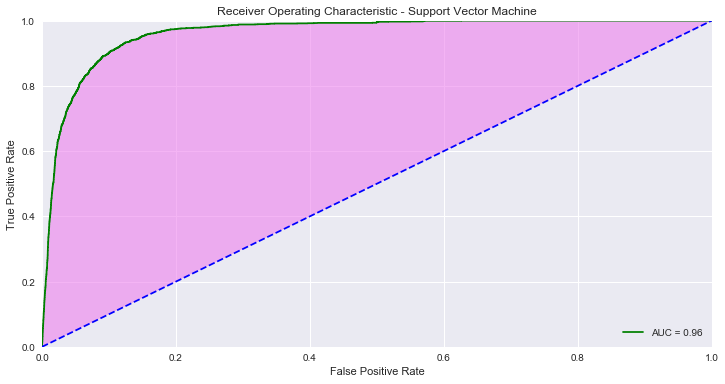

In [118]:
probs = svc2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - Support Vector Machine')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, tpr,fpr, facecolor='violet', alpha=0.6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
knn2=KNeighborsClassifier(n_neighbors= 100, weights= 'uniform',n_jobs=-1)
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='uniform')

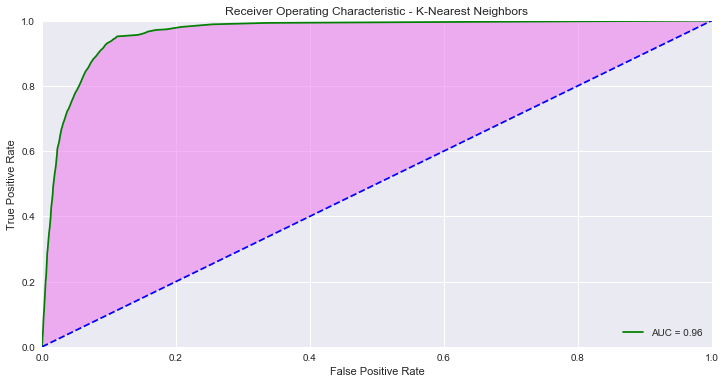

In [120]:
probs = knn2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, tpr,fpr, facecolor='violet', alpha=0.6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
rf2=RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 7,
                           max_features= 10, min_samples_leaf= 10,
                           min_samples_split= 100,n_jobs=-1)
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

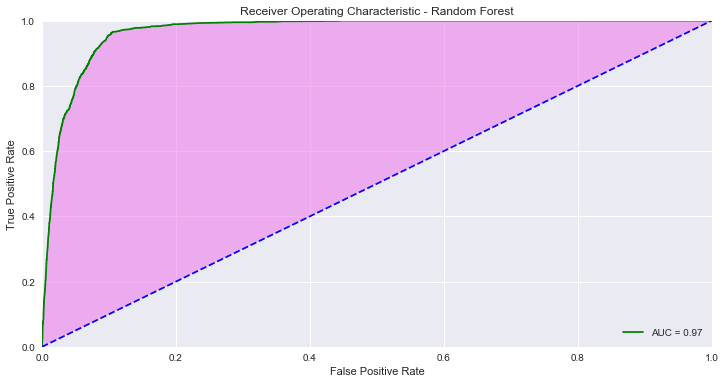

In [122]:
probs = rf2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, tpr,fpr, facecolor='violet', alpha=0.6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We see very similar fitting score for all of the cases. For this reason, we can say that our feature engineering step segrated the classes pretty well through mean-rank encoding of categories. That might be the reason why marginal/no improvement is seen for more complicated models.

Therefore, we were able to reach the maximum quality (AUC) using a simple logistic regression.

## 6-4- Gradient Boosted Trees as a Boosting Technique

Just before we finish, and although our data showed marginal improvement when more complicate models are used, let's give the gradient boosted trees a chance to see how boosting trees would affect the results. Here is how we perform hypertuning using gridsearchcv.

In [123]:
#t_start = time.time()
#X_train = pd.read_csv("X_train.csv").drop(columns=["Unnamed: 0","index"], axis=1)
#y_train = pd.read_csv("y_train.csv").drop(columns=["Unnamed: 0","id"], axis=1).target.values
#parameters = {'min_child_weight': [5, 10],
#        'gamma': [0.01, .1,1],
#        'subsample': [0.8,1],
#        'colsample_bytree': [0.6, 0.8],
#        'max_depth': [3, 5,  7]
#        }
#xgbc = XGBClassifier(objective='binary:logistic',
#                    silent=True, verbose=True, scale_pos_weight=8)# 'scale_pos_weight' to set as the ratio for skewed data

#clf_xgbc=GridSearchCV(estimator=xgbc,param_grid=parameters, scoring='roc_auc', cv=3, n_jobs=1,verbose=100)
#clf_xgbc.fit(X_train, y_train)

#print("Best parameters are {}".format(clf_xgbc.best_params_))
#print("Best score is {}".format(clf_xgbc.best_score_))

#t_end = time.time()
#print("It took {} seconds to run this test".format(t_end-t_start))

And here is the results for XGBoost classifier hyper tuning.

**Best parameters are** ``{'colsample_bytree': 0.6, 'gamma': 30, 'learning_rate': 0.02, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 1000, 'subsample': 0.6}``

**Best score is** ``0.9702629524162981``

It took ``926.2014994621277 seconds`` to run this test.

In [124]:
params = {}
params["objective"] = "binary:logistic"
params["eval_metric"] = "auc"
params["gamma"] = 30
params["eta"] = 0.02
params["min_child_weight"] = 5
params["subsample"] = 0.6
params["colsample_bytree"] = 0.8
params["scale_pos_weight"] = 1.0
params["silent"] = 1
params["max_depth"] = 6
params["n_jobs"]=-1

plst = list(params.items())

xgtrain = xgb.DMatrix(X_train, label=y_train)
xgval = xgb.DMatrix(X_test, label=y_test)

#train using early stopping and predict

watchlist = [(xgtrain, 'train'),(xgval, 'val')]

num_rounds = 1000


model = xgb.train(plst, xgtrain, num_rounds,watchlist, early_stopping_rounds=10, verbose_eval=False)

preds1 = model.predict(xgval)

for loop in range(100):
    model = xgb.train(plst, xgtrain, num_rounds,watchlist, early_stopping_rounds=10, verbose_eval=False)
    preds1 = preds1 + model.predict(xgval)
preds = (preds1/101 )

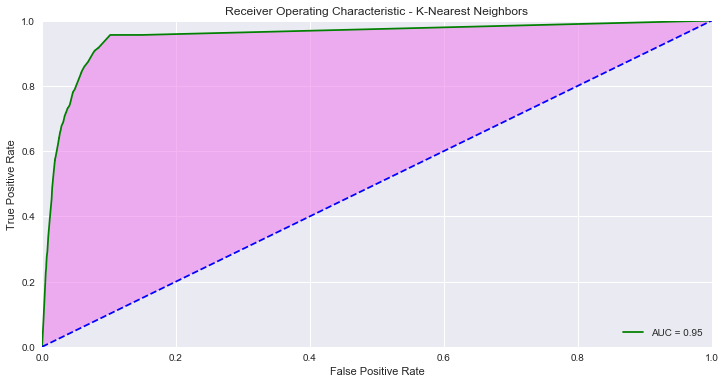

In [125]:
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, tpr,fpr, facecolor='violet', alpha=0.6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Even a more complex classifier like XGBoost doesn't improve our technique significantly. Therefore, we can say that we maximized the optimization of our feature set and in order to improve our results, we need more data to be able to develope more feature. Some basic identifying features, e.g. age, gender, state would be really discriminative.

Here is a summary of our results:

| Model | Hypertuned? | Area Under Curve |
| --- | --- | --- |
| Logistic Regression | No | 0.97 |
| Support Vector Machine | Yes | 0.96 |
| K-Nearest Neighbor | Yes | 0.96 |
| Random Forest | Yes | 0.97 |
| Gradient Boosted Trees| Yes | 0.95 |

We are positive that a simple technique, such as logistic regression is capable of segregating two classes. An advantage of using logistic regression is its simlicity and ease in interpretation and communicating the ideas.

# Details - Task 3: 

Build a model to forecast the number of new drivers we expect to start every week.
How would you validate a model like this? What other information would you use if you had access to all of Uber's data?

For this question, we need to generate a new dataset from what we have from the beginning. The main data is a time series that has the number of drivers as the value to predict. Since we are adding data as we go ** we will combine the EDA and Feature Engineering steps**.

In [126]:
regr_data = pd.read_csv('ds_challenge_v2_data.csv',usecols=['first_completed_date', 'id'])\
.groupby('first_completed_date').count().reset_index()
regr_data['first_completed_date'] = pd.to_datetime(regr_data['first_completed_date'],infer_datetime_format=True)

In [127]:
regr_data.columns = ['date','num_drivers']
regr_data = regr_data.sort_values('date')
regr_data.head()

,date,num_drivers
22,2016-01-04,10
23,2016-01-05,72
24,2016-01-06,64
25,2016-01-07,94
26,2016-01-08,94


We, now, have daily counts of the drivers who become Uber drivers. We, however, need the weekly counts.

In [128]:
regr_data = regr_data.set_index('date').resample('W').sum().reset_index()

In [129]:
regr_data

,date,num_drivers
0,2016-01-10,557
1,2016-01-17,934
2,2016-01-24,1213
3,2016-01-31,1332
4,2016-02-07,1117
5,2016-02-14,577
6,2016-02-21,303
7,2016-02-28,103
8,2016-03-06,1


We are down to 9 observation. Let's see how this weekly aggregate changes over time.

(array([2401, 2406, 2410], dtype=int64), <a list of 3 Text xticklabel objects>)

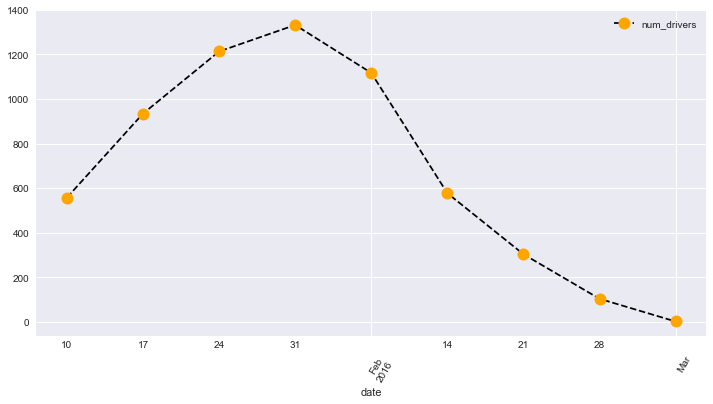

In [130]:
regr_data.set_index('date').plot(color='black', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=12, label = 'weekly acitivation')
plt.xticks(rotation=60)

We see an obvious pattern:

>As we start the registration people start to become driver more and more, and this section of data is quite linear. And as we finish the registration (end of January), it  will start dropping. So an intuitive option is to see how many registration we have in the last thirty days. 

I will import a new dataset that has all the data so that we can use it for further.

In [131]:
data = pd.read_csv('ds_challenge_v2_data.csv')
date_column = ['signup_date', 'bgc_date', 'vehicle_added_date', 'first_completed_date']
for date_column in date_column:
    data[date_column] = pd.to_datetime(data[date_column],infer_datetime_format=True)

First, I would like to see what is the cumulative previous 30 days of number of registration. I also need to add the rest of the date indexes that are available on the activation date and not on the registration date.

In [132]:
daily_signup = data[['signup_date','id']].groupby('signup_date').id.count().reset_index()
daily_signup.columns = ['date','signup_num']

daily_signup.tail()

,date,signup_num
25,2016-01-26,1908
26,2016-01-27,1838
27,2016-01-28,1706
28,2016-01-29,1598
29,2016-01-30,1466


> As we see at the tail of this column, the registration data doesn't extend to th end of the activation data which is March 3rd. Therefore, we need to extend the dataframe to that date.

In [133]:
# adding data range that is not available
idx = pd.date_range('2016-01-31', '2016-03-06')
added_date = pd.DataFrame(columns=['signup_num'], index=idx)
added_date = added_date.reset_index()
added_date.columns = ["date","signup_num"]
added_date['signup_num'] = 0
added_date.tail()

,date,signup_num
31,2016-03-02,0
32,2016-03-03,0
33,2016-03-04,0
34,2016-03-05,0
35,2016-03-06,0


In [134]:
daily_signup = pd.concat([daily_signup,added_date]).reset_index().drop(columns='index',axis=1)

In [135]:
daily_signup.tail()

,date,signup_num
61,2016-03-02,0
62,2016-03-03,0
63,2016-03-04,0
64,2016-03-05,0
65,2016-03-06,0


Now we calculate the past 30 days number of registrations and then plot it over time.

In [136]:
daily_signup['signup_num'] = daily_signup.set_index('date').rolling(window=30,min_periods=1).sum().reset_index()['signup_num']

(array([16797, 16801, 16832, 16861, 16869], dtype=int64),
 <a list of 5 Text xticklabel objects>)

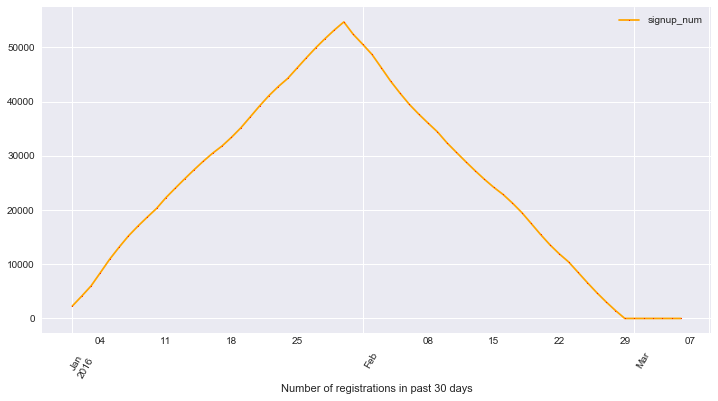

In [137]:
daily_signup.set_index('date').plot(color='orange', marker='o',
         markerfacecolor='red', markersize=1 ,label = 'past month rolling sum')

plt.xlabel('Number of registrations in past 30 days')
plt.xticks(rotation=60)

In [138]:
regr_data = regr_data.merge(daily_signup, on = "date", how="left")
regr_data.head()

,date,num_drivers,signup_num
0,2016-01-10,557,20283.0
1,2016-01-17,934,31811.0
2,2016-01-24,1213,44253.0
3,2016-01-31,1332,52399.0
4,2016-02-07,1117,37677.0


We noticed that the trend is very similar to the trend of number of activations. We might use the data from this feature to predict the number of drivers. Let's see how these two columns are in a scatter plot.

Text(0,0.5,'Number of drivers')

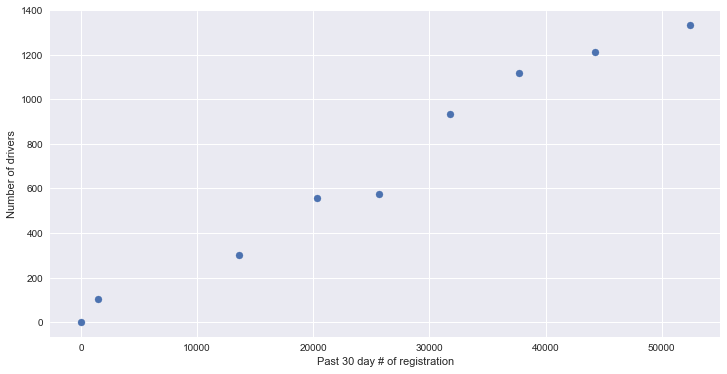

In [139]:
plt.scatter(regr_data.signup_num, regr_data.num_drivers)
plt.xlabel("Past 30 day # of registration")
plt.ylabel("Number of drivers")

We see a beautifull linear relation between the past 30 days number of registration and number of drivers. Since we only have 9 observations, we use bootstrapping to assure that the outliers don't dominate our study.

In [140]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [141]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(regr_data.signup_num, regr_data.num_drivers, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

[0.02446778 0.0301342 ]


We see that the confidence interval for the slope of the regression is quite acceptable and within a small range. However, in ordet to assure that, we first need to see the graph of the bootstrap slopes and also take a look at the $R^2$ of the relationship between parameters.

Text(0,0.5,'Number of drivers')

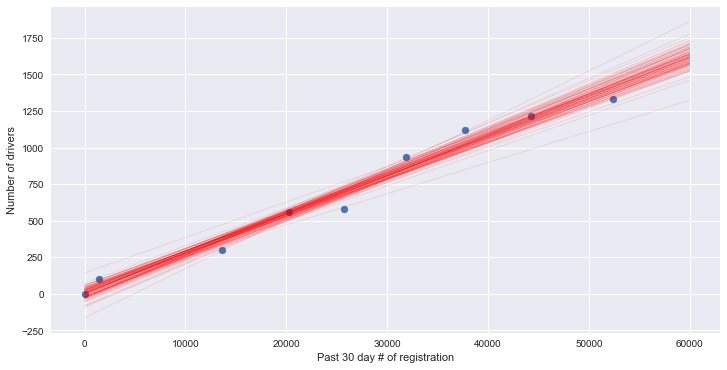

In [142]:
x = np.array([0, 60000])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')
    
    
plt.scatter(regr_data.signup_num, regr_data.num_drivers)
plt.xlabel("Past 30 day # of registration")
plt.ylabel("Number of drivers")

In [143]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['R^2'] = ssreg / sstot

    return results

In [144]:
polyfit(regr_data.signup_num,regr_data.num_drivers,1)

{'polynomial': [0.026604046425548394, 10.405713113205897],
 'R^2': 0.9771222738755977}

I think 98% variance being explained is enough for a model with 9 observations. This was just a feasibility study. Now, since we also want to validate our results, I will drop one row randomly and keep it for prediction.

In [145]:
dropped_row_index = np.random.randint(regr_data.shape[0]) 
dropped_row = regr_data.iloc[dropped_row_index]
remaining_rows = regr_data.drop(axis=0,index=dropped_row_index)

In [146]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(np.array(remaining_rows.signup_num),
                                                        np.array(remaining_rows.num_drivers), size=1300)

# Compute and print 95% CI for slope
min_slope, median_slope, max_slope =np.percentile(bs_slope_reps, [2.5,50,97.5])
min_intercept, median_intercept, max_intercept = np.percentile(bs_intercept_reps, [2.5,50,97.5])

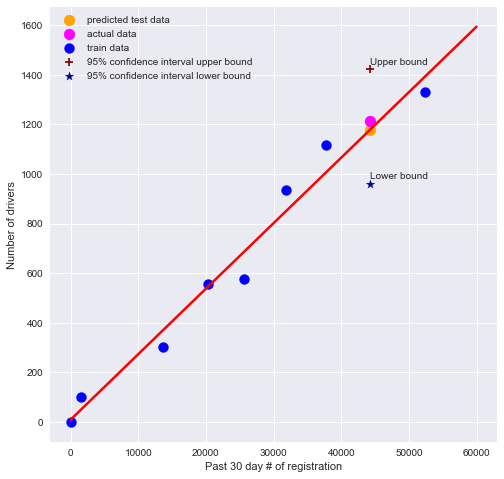

In [147]:
fig1 = plt.figure(figsize=(8, 8))

y_predict = median_intercept + median_slope * dropped_row.signup_num
y_actual = dropped_row.num_drivers

y_upper = max_intercept  + max_slope * dropped_row.signup_num
y_lower = min_intercept + min_slope * dropped_row.signup_num

plt.scatter(dropped_row.signup_num,y_predict , color = 'orange', label = "predicted test data", s =120)
plt.scatter(dropped_row.signup_num,y_actual , color = 'magenta', label = "actual data", s = 120)
plt.scatter(remaining_rows.signup_num, remaining_rows.num_drivers, color = 'blue', label = "train data",s = 100)


# to include uncertaintly due to small number of observations
plt.scatter(dropped_row.signup_num,y_upper , color = 'darkred', marker="+",
            label = "95% confidence interval upper bound", s =80)
plt.annotate('Upper bound', (dropped_row.signup_num+20,y_upper+20))


plt.scatter(dropped_row.signup_num,y_lower , color = 'darkblue', marker="*",
            label = "95% confidence interval lower bound", s =80)
plt.annotate('Lower bound', (dropped_row.signup_num+20,y_lower+20))



x = np.array([0, 60000])

_ = plt.plot(x, median_slope * x + median_intercept,
                 linewidth=2.5, color='red')
plt.xlabel("Past 30 day # of registration")
plt.ylabel("Number of drivers")
plt.legend()

In [148]:
print("For the week ending at {} with actual number of drivers = {}, the model predicted {} drivers with {}% error.".format(
regr_data.iloc[dropped_row_index+1]['date'], y_actual, y_predict, round(np.abs((y_actual-y_predict)/y_actual)*100),1))

For the week ending at 2016-01-31 00:00:00 with actual number of drivers = 1213, the model predicted 1178.2399697901687 drivers with 3.0% error.


**Caveat: With bigger data set we might see more patterns that require more features to explain the variance. Therefore, for this task larget number of observations is essential.**

I'd like to also add that I went ahead and perform an ARIMA model on the daily variation of number of UBER drivers. However, the results didn't look acceptable.

**Caveat: Since there is no periodicity seen in the data (which means we havent yet captured enough information), time series prediction models such as ARIMA tend to be inefficient. Therefore, for this particular example, we needed to use historical information captured from the main data set to mimic the results.**